# Telecom Churn Case Study

## Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.


## Business Objective
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. The given dataset contains customer-level informations for few consecutive months June, July & August they are encoded as 6,7 & 8. The business objective is to predict the cusotmer which will churn in next month by analyzing the dataset 


## High Value Customers:
One of the primary goal is to identify high value customers which are more likely to churn, as most of the profit comes from high value customers in telecom industry.

Customers which are likely to churn will starting decreasing rhe recharge amount (total recharge amount) and other facilities. To identify high value customers, total_rech_data can be calculated and total dataset can be filtered which are greater than 70th percent of the data

## The solution is divided into the following sections: 
- Data Understanding, Preparation, and Pre-Processing
- Feature Engineering and Variable Transformation
- Exploratory Data Analysis
- Model Selection, Model Building, and  Prediction

### 1. Data Understanding, Preparation, and Pre-Processing

In [1]:
#import the libraries required for further analysis
#Load the libraries which will be required further for analysis

import numpy as np
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier


# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### Load the train and test data set together and perform the cleaning together

In [2]:
# Load the data set
telecom_data = pd.read_csv("train.csv")
telecom_data.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
#Load the test data set
telecom_data_test = pd.read_csv("test.csv")
telecom_data_test.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [4]:
# Train data set shape
telecom_data.shape 

(69999, 172)

In [5]:
# Test data set shape
telecom_data_test.shape 

(30000, 171)

In [6]:
# check the column types i.e. int, object and float
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [7]:
telecom_data.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

#### Observations

- Some of the columns have very less variance in data set for ex: log_og_t20_mou, std_og_t2o_mou, loc_ic_t20_mou
- Columns with roam_ic, roam_og have very less variance in dataset
- Columns with spl, isd, ic &  total_recharge have very less variance in dataset

#### Inference
One of the objective of telecom industry is to retain high value customers, as most of the profit comes from them.

- Columns with very less variance or zero variance can be dropped or other features may be created to show if customers avail that features or not
- Columns night_pack and fb_user may be the scheme, which customers are availaing and may not be of much significance
- Few columns can be created such as total to reflect the amount spent by customer for our analysis


##### Check for the columns marked with Object, they need to be converted into right data type

In [8]:
# Check for the columns marked with object, Later need to be converted into right data type
telecom_data.select_dtypes(include='object').head(5)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [9]:
# print the columns marked as object
telecom_data_object = telecom_data.select_dtypes(include='object')
telecom_data_object_cols = telecom_data_object.columns.tolist()

print("\n Columns marked with object ::",telecom_data_object_cols)
print("\n Number of columns for data frame ::", len(telecom_data_object_cols))


 Columns marked with object :: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

 Number of columns for data frame :: 9


#### Data Imputing:

- Default the laste date of month columns with their respective values. These columns can be safely dropped later and they not be much of help

In [10]:
# Default the column values for last date of the month
telecom_data['last_date_of_month_6'] = '6/30/2014'
telecom_data['last_date_of_month_7'] = '7/31/2014'
telecom_data['last_date_of_month_8'] = '8/31/2014'

#### Common utility functions to be used later

In [11]:
# Function to print missing values
def print_column_with_missing_values(data_frame, threshold = 0):
    column_with_null_values = round(100* (data_frame.isnull().sum().sort_values(ascending = False)/len(data_frame.index)), 2)
    column_with_null_values = column_with_null_values[column_with_null_values > threshold]
    #print(column_with_null_values)
    print('\n Number of columns with missing values :: ', len(column_with_null_values.index))
    return column_with_null_values.to_frame()
    
# Function to impute na columns with zero   
def fill_na_columns_with_zero(data_frame, telecom_data_cols_na):
    df_columns = data_frame.columns
    avail_columns = []
    for column in telecom_data_cols_na:
        if column in df_columns: 
            if column not in avail_columns: avail_columns.append(column)            
    data_frame[avail_columns].fillna(0, inplace=True)
        
        
# Function to print columns with zero variance
def print_columns_with_zero_variance(data_frame, variance = 0):
    data_frame_with_variance = pd.DataFrame(telecom_data.var())
    data_frame_with_variance.columns = ['variance']
    print(data_frame_with_variance[data_frame_with_variance['variance'] == variance])
    
# Function to extract columns with prefixes. for ex: total_
def filter_columns_with_prefix(data_frame, prefix):
    columns_with_prefix = []
    for col in data_frame.columns.tolist():
        if prefix in col: columns_with_prefix.append(col)            
    return columns_with_prefix    

# Function to extract unique prefixes for the column
def filter_columns_with_unique_prefix(data_frame):
    unique_column_list = []
    for col in data_frame.columns.tolist():
        if '_' in col:
            unique_column = col[0:col.find('_')]
            if unique_column not in unique_column_list: unique_column_list.append(unique_column)                
    return unique_column_list

# Function to extract column names with keywords appearing in middle of the column
def filter_columns_with_keyword(data_frame, keyword):
    unique_column_list = []
    for col in data_frame.columns.tolist():
        column_name = '_' + keyword + '_'
        if column_name in col:
            unique_column_list.append(col)
    return unique_column_list

In [12]:
## check for columns with missing or null values
print_column_with_missing_values(telecom_data)


 Number of columns with missing values ::  123


,0
max_rech_data_6,74.90
total_rech_data_6,74.90
arpu_2g_6,74.90
count_rech_3g_6,74.90
count_rech_2g_6,74.90
av_rech_amt_data_6,74.90
arpu_3g_6,74.90
night_pck_user_6,74.90
fb_user_6,74.90
date_of_last_rech_data_6,74.90


In [13]:
# Check for columns where missing values are more than 40%
print_column_with_missing_values(telecom_data, 40)


 Number of columns with missing values ::  30


,0
max_rech_data_6,74.90
total_rech_data_6,74.90
arpu_2g_6,74.90
count_rech_3g_6,74.90
count_rech_2g_6,74.90
av_rech_amt_data_6,74.90
arpu_3g_6,74.90
night_pck_user_6,74.90
fb_user_6,74.90
date_of_last_rech_data_6,74.90


#### Load the data dictionary before analysis to understand the column

In [14]:
# Load data dictionary for analysis
telecom_data_dictionary = pd.read_csv("data_dictionary.csv")
telecom_data_dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [15]:
# print the data to understand more about column nature
telecom_data.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [16]:
# Chech the summary matrix for columns
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


#### Observations:
- Columns with Object data type : 9
- Columns with int data type : 28
- Columns with float data type: 135

In [17]:
telecom_data.select_dtypes(include='object').head(5)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


<font color="red">Observations: </font>
- All the columns are of date object type
- Missing values from the columns indicate that customer may switch to other telecom providers and purposefully have missed the recharge
- These columns can be dropped later as high value customers can be found out by recharge amount

### Data imputing

#### Impute missing values for numerical columns
 - Columns with missing values can be safely imputed to zero as absence of data indicates that customers may switch to new telecom providers, and purposefully may not recharge or avail the facility

#### impute missing values for non numerical columns (i.e. object)
 - Date objects may not of much significance as high value customers can be found by looking at total amount.
 - Missing date objects may represent in missing recharge amount and unavailability of other services


In [18]:
# Select the object column data types & missing values and impute the non numerica values with zero
obect_columns = telecom_data.select_dtypes(include='object').columns.tolist()

# selected the columns with missing values
columns_with_missing_values = print_column_with_missing_values(telecom_data)
columns_with_missing_values = list(columns_with_missing_values.index)


 Number of columns with missing values ::  123


#### Impute the missing numerical column values with zero, 

In [19]:
telecom_data_cols_na = []
for column in columns_with_missing_values:
    if (column not in obect_columns): 
        telecom_data[column].fillna(0, inplace=True)
        telecom_data_test[column].fillna(0, inplace=True)

In [20]:
# print the columns with missing value
print_column_with_missing_values(telecom_data)


 Number of columns with missing values ::  6


,0
date_of_last_rech_data_6,74.90
date_of_last_rech_data_7,74.48
date_of_last_rech_data_8,73.69
date_of_last_rech_8,3.52
date_of_last_rech_7,1.76
date_of_last_rech_6,1.57


#### Drop the columns with missing values as they do not have much significance

Columns with date_of_last_rech_data & date_of_last_rech may not be of much significance as the high value customers can be derived from data usages and total recharge amount

In [21]:
# Drop the columns date_of_last_rech & date_of_last_rech_data
telecom_data_cols_drop = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
telecom_data_cols_drop = telecom_data_cols_drop + ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

telecom_data.drop(telecom_data_cols_drop, axis=1, inplace = True)
telecom_data_test.drop(telecom_data_cols_drop, axis=1, inplace = True)

Drop the last date of month columns as they do have any contribution to model building

In [22]:
# Last date of month is always constant and these columns can be safely dropped
telecom_data_cols_drop = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
telecom_data.drop(telecom_data_cols_drop, axis=1, inplace = True)
telecom_data_test.drop(telecom_data_cols_drop, axis=1, inplace = True)

In [23]:
## Check again for the columns with missing values
result = print_column_with_missing_values(telecom_data)


 Number of columns with missing values ::  0


In [24]:
# Check the shape of the dataset
telecom_data.shape

(69999, 163)

#### Drop the columns with zero variance

In [25]:
# check for columns with zero variance and remove it
print_columns_with_zero_variance(telecom_data)

                  variance
circle_id              0.0
loc_og_t2o_mou         0.0
std_og_t2o_mou         0.0
loc_ic_t2o_mou         0.0
std_og_t2c_mou_6       0.0
std_og_t2c_mou_7       0.0
std_og_t2c_mou_8       0.0
std_ic_t2o_mou_6       0.0
std_ic_t2o_mou_7       0.0
std_ic_t2o_mou_8       0.0


In [26]:
cols_with_0_var = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
cols_with_0_var = cols_with_0_var + ['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8']
cols_with_0_var = cols_with_0_var + ['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

telecom_data.drop(cols_with_0_var, axis=1, inplace = True)
telecom_data_test.drop(cols_with_0_var, axis=1, inplace = True)

In [27]:
print('telecom data set size after dropping zero variance columns', telecom_data.shape)

telecom data set size after dropping zero variance columns (69999, 153)


## 2. Feature Engineering (Derive new feature and drop unwanted features)

- Some of the variables are available as part of other attributes
- columns with very less variance or representing scheme can be combined and a new feature columns may be created to show the service availability

- Calculate total_recharge_amount by combining other columns

### Create new variable by combing total, rech_amt & rech_data

- Data set contains total_rech_data, av_rech_amt_data and total_data_rech_amt which can be added together to find the total amount spend by customer.
- Filter the customers where total recharge amount > 70th percentile of data, and company can focus on this

In [28]:
# Check for available columns with total keyword and see what they represent
filter_columns_with_prefix(telecom_data, 'total')

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

In [29]:
# print all the columns starting with rech_amt
filter_columns_with_keyword(telecom_data, 'rech_amt')

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [30]:
# Check for columsn with rech_data
filter_columns_with_keyword(telecom_data, 'rech_data')

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8']

In [31]:
# Create a new column by combining rech_data_amount & rech_amount
telecom_data['total_rech_6'] = telecom_data['total_rech_amt_6'] + telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_rech_7'] = telecom_data['total_rech_amt_7'] + telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7']
telecom_data['total_rech_8'] = telecom_data['total_rech_amt_8'] + telecom_data['total_rech_data_8'] * telecom_data['av_rech_amt_data_8']

# operation on test data set.
telecom_data_test['total_rech_6'] = telecom_data_test['total_rech_amt_6'] + telecom_data_test['total_rech_data_6'] * telecom_data_test['av_rech_amt_data_6']
telecom_data_test['total_rech_7'] = telecom_data_test['total_rech_amt_7'] + telecom_data_test['total_rech_data_7'] * telecom_data_test['av_rech_amt_data_7']
telecom_data_test['total_rech_8'] = telecom_data_test['total_rech_amt_8'] + telecom_data_test['total_rech_data_8'] * telecom_data_test['av_rech_amt_data_8']

telecom_data.head(5)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0,77.0,65.0,10.0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0,0.0,290.0,50.0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6

#### Observations:
- Create a new column by combining 6 and 7, if customer want to churn out, his next month usages can be compared to this.
- In addition, 70th percentile of the data can be used to filter out good customers which company may want to retain it

## Filtering High Value customers

- From the dataset, records are available for the month of June, July & Aug. High value customers can be found about by taking the mean of the data of total recharge 6, 7. 

- Customer usages can be seen across these months and it can be compared with month 8. If data usages are consistently decreasing, company may focus on those customers

In [32]:
# Combine column 6 & 7
telecom_data['total_rech_6_7'] = telecom_data['total_rech_6'] + telecom_data['total_rech_7'] 

print('average recharge amount for june & july month ', round(telecom_data['total_rech_6_7'].mean(), 2))

amount_70th_percentile = telecom_data['total_rech_6_7'].quantile(0.7)
print("70th percentile of the average recharge amount - ", amount_70th_percentile)

# Customers which should be retained i.e. their recharge amount usages are more than 70%
telecom_data_hv = telecom_data[telecom_data['total_rech_6_7'] >= amount_70th_percentile]

telecom_data.drop(['total_rech_6_7'], axis=1, inplace = True)
telecom_data_hv.drop(['total_rech_6_7'], axis=1, inplace = True)

average recharge amount for june & july month  971.52
70th percentile of the average recharge amount -  955.0


In [33]:
print('\nTotal customers data after cleansing ', telecom_data.shape)
print('Total customers data after selecting high profile customers ', telecom_data_hv.shape)


Total customers data after cleansing  (69999, 156)
Total customers data after selecting high profile customers  (21013, 156)


In [34]:
telecom_data['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [35]:
telecom_data_hv['churn_probability'].value_counts()

0    19274
1     1739
Name: churn_probability, dtype: int64

In [36]:
#Check how the data is distributed
telecom_data.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69

### Data Insight for high value customers churning and not churning before perorming any operation

- Analyse the data set for customers churning and not churning

In [37]:
# Filter the columns with churn 1 and zero to see th data distribution
telecom_data_hv_1 = telecom_data_hv[telecom_data_hv['churn_probability'] == 1]
telecom_data_hv_0 = telecom_data_hv[telecom_data_hv['churn_probability'] == 0]

In [38]:
## percentile of data distribution for customers which are not churning
column_with_totals = filter_columns_with_prefix(telecom_data, 'total')
telecom_data_hv_0[column_with_totals].describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_6,total_rech_7,total_rech_8
count,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000,19274.000000
mean,597.005378,628.075217,582.610234,293.243426,303.665783,297.004679,11.707845,11.770053,10.404638,650.530871,661.264968,612.521013,1.672720,1.908685,1.729740,1108.643551,1211.200102,1109.425033
std,669.921170,705.827681,709.664818,361.912260,369.123516,359.913654,9.102283,9.344574,9.317272,560.908618,590.095427,640.323711,2.826441,3.142521,3.093262,1480.127475,1683.676250,1880.622202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,13.819000,16.081000,8.930000,21.433000,27.846000,22.810000,4.000000,4.000000,2.000000,196.000000,201.000000,130.000000,0.000000,0.000000,0.000000,375.000000,407.000000,210.300000
25%,118.065000,125.080000,102.787500,76.332500,85.465000,78.990000,6.000000,6.000000,4.000000,358.000000,360.000000,280.000000,0.000000,0.000000,0.000000,540.000000,564.000000,447.000000
50%,404.245000,430.085000,367.735000,188.025000,196.160000,193.285000,9.000000,9.000000,8.000000,557.000000,565.000000,512.000000,1.000000,1.000000,1.000000,778.000000,824.000000,725.000000
75%,841.900000,889.015000,809.437500,376.462500,386.832500,380.620000,14.000000,15.000000,13.000000,816.750000,827.750000,794.000000,2.000000,2.000000,2.000000,1200.000000,1287.000000,1200.000000
90%,1400.456000,1470.287000,1398.753000,669.436000,683.706000,669.788000,22.000000,23.000000,21.000000,1164.000000,1183.000000,1166.000000,5.000000,6.000000,5.000000,1991.700000,2216.000000,2120.000000
95%,1855.449500,1928.612500,1889.880500,930.215000,942.620500,944.405000,29.000000,29.000000,28.000000,1448.000000,1500.000000,1504.000000,7.000000,8.000000,8.000000,2896.000000,3184.350000,3123.350000


#### Observation:

 - Churn customers (telecom_data_hv_1): We can see from the matrix above that the average data for columns (i.e. otal_rech_num, total_rech_amt, total_rech_data) constantly decreases in next month i.e. June, July & Aug 
 
 - Customers which are not churning (telecom_data_hv_0): data set values remains fairly constant across month

In [39]:
## Check the records count for each type of customers..
print('High value customers records not chruning with probability(0) : ', len(telecom_data_hv_0))
print('High value customers records chruning with probability (1) : ', len(telecom_data_hv_1))

High value customers records not chruning with probability(0) :  19274
High value customers records chruning with probability (1) :  1739


## Feature exploration

### 1. Univariate analysis: (night_pack, fb_user, monthly_2g/3g

In [40]:
# Check the column variance
telecom_data_hv.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8
count,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,2101

In [41]:
# Check the unique values across each column to find the variation in dataset
telecom_data_hv.nunique()

id                    21013
arpu_6                20467
arpu_7                20475
arpu_8                19789
onnet_mou_6           13090
onnet_mou_7           13127
onnet_mou_8           12316
offnet_mou_6          16100
offnet_mou_7          16136
offnet_mou_8          15342
roam_ic_mou_6          3136
roam_ic_mou_7          2618
roam_ic_mou_8          2600
roam_og_mou_6          3561
roam_og_mou_7          2968
roam_og_mou_8          3004
loc_og_t2t_mou_6       8511
loc_og_t2t_mou_7       8478
loc_og_t2t_mou_8       8185
loc_og_t2m_mou_6      12402
loc_og_t2m_mou_7      12369
loc_og_t2m_mou_8      11984
loc_og_t2f_mou_6       2609
loc_og_t2f_mou_7       2622
loc_og_t2f_mou_8       2526
loc_og_t2c_mou_6       1434
loc_og_t2c_mou_7       1480
loc_og_t2c_mou_8       1451
loc_og_mou_6          14182
loc_og_mou_7          14203
loc_og_mou_8          13531
std_og_t2t_mou_6       8393
std_og_t2t_mou_7       8473
std_og_t2t_mou_8       7754
std_og_t2m_mou_6       9915
std_og_t2m_mou_7    

#### Common function for box plot analysis

In [42]:
# Boxplot for categorical variables to see how they are related to sales price.
def box_plot_analysis(data_frame, vars_cat):   
    plt.figure(figsize=(15, 150))
    for i in enumerate(vars_cat):
        plt.subplot(20, 2,i[0]+1)
        ax = sns.boxplot(data = data_frame, x=i[1], y='churn_probability')
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
        ax.set_title(i[1] + " vs Churn prob.", fontsize=14)
        ax.set_xlabel(i[1], fontsize=14)
        ax.set_ylabel("Churn Probability", fontsize=15)
    plt.show()

#### Plot the graph for columns with less variance for data analysis

 Check the variance of data night_pck_* , fb_user_*, and monthly_*

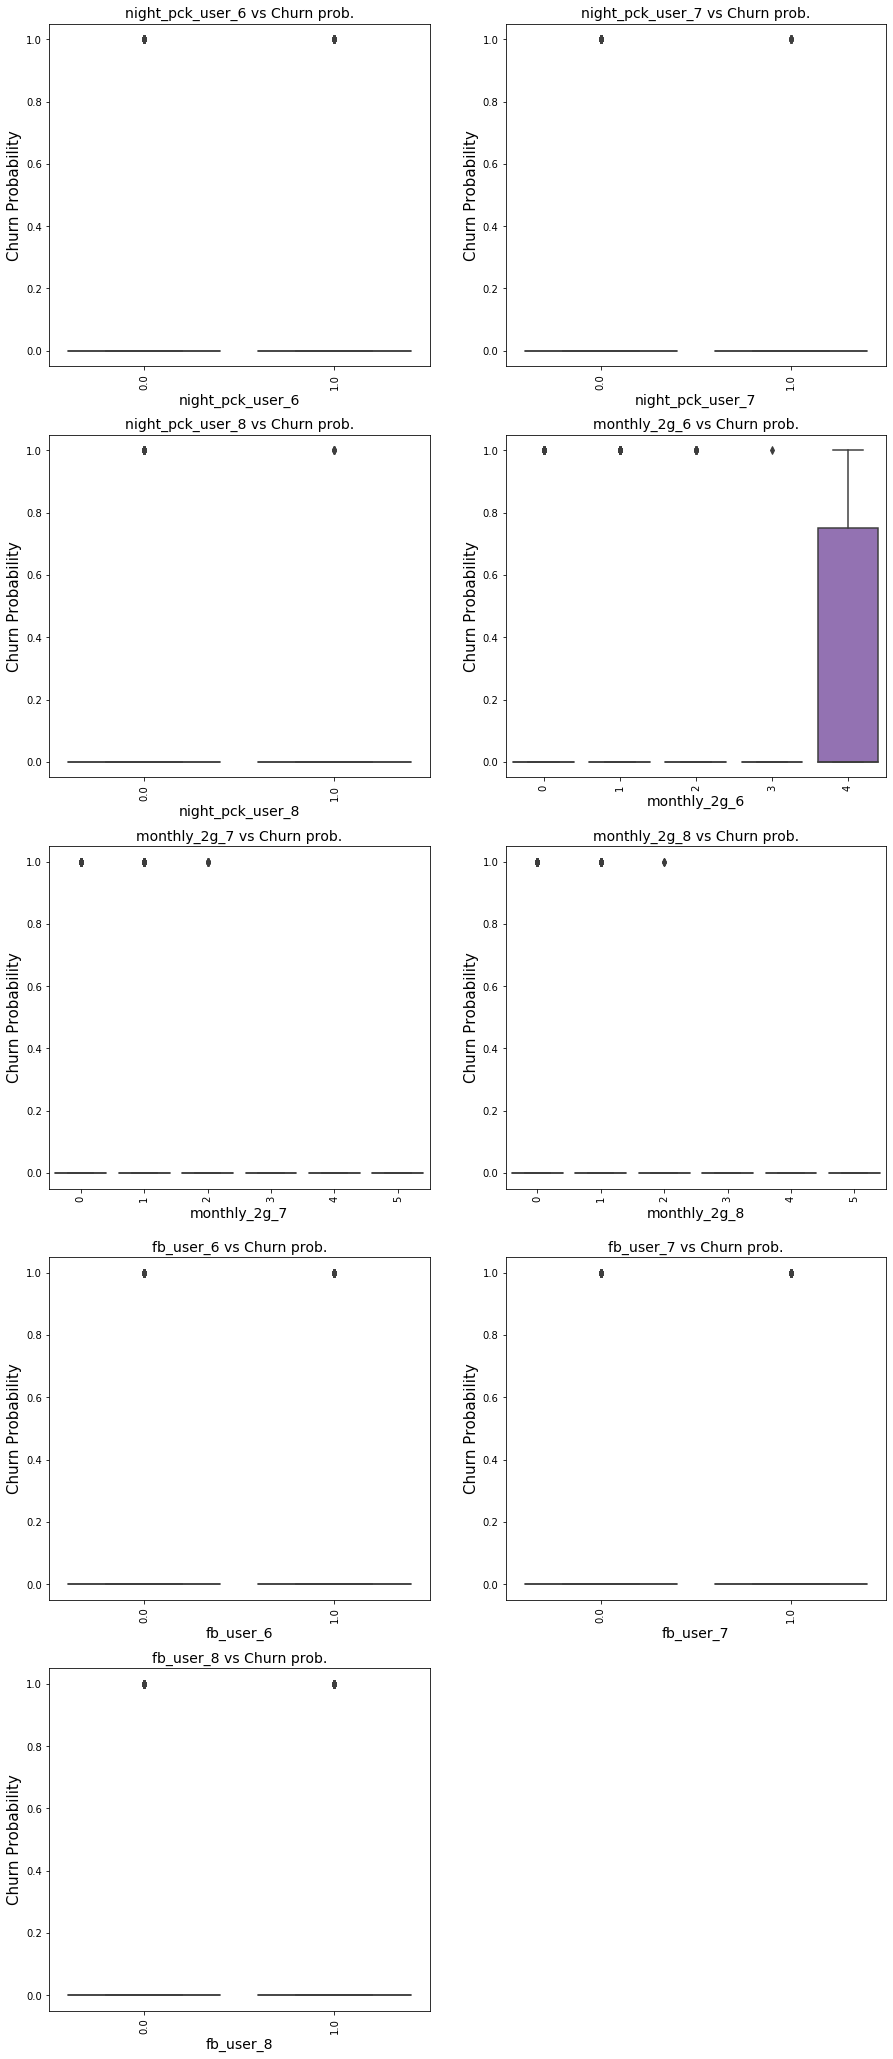

In [43]:
#box plot analysis for columns with less variance
columns_with_less_variance = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
columns_with_less_variance = columns_with_less_variance + ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
columns_with_less_variance = columns_with_less_variance + ['fb_user_6', 'fb_user_7', 'fb_user_8']

box_plot_analysis(telecom_data_hv, columns_with_less_variance)

In [44]:
telecom_data_hv.drop(columns_with_less_variance, axis=1, inplace = True)
telecom_data_test.drop(columns_with_less_variance, axis=1, inplace = True)
print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (21013, 147)


In [45]:
# check the colum variance for further analysis
telecom_data_hv.nunique()

id                    21013
arpu_6                20467
arpu_7                20475
arpu_8                19789
onnet_mou_6           13090
onnet_mou_7           13127
onnet_mou_8           12316
offnet_mou_6          16100
offnet_mou_7          16136
offnet_mou_8          15342
roam_ic_mou_6          3136
roam_ic_mou_7          2618
roam_ic_mou_8          2600
roam_og_mou_6          3561
roam_og_mou_7          2968
roam_og_mou_8          3004
loc_og_t2t_mou_6       8511
loc_og_t2t_mou_7       8478
loc_og_t2t_mou_8       8185
loc_og_t2m_mou_6      12402
loc_og_t2m_mou_7      12369
loc_og_t2m_mou_8      11984
loc_og_t2f_mou_6       2609
loc_og_t2f_mou_7       2622
loc_og_t2f_mou_8       2526
loc_og_t2c_mou_6       1434
loc_og_t2c_mou_7       1480
loc_og_t2c_mou_8       1451
loc_og_mou_6          14182
loc_og_mou_7          14203
loc_og_mou_8          13531
std_og_t2t_mou_6       8393
std_og_t2t_mou_7       8473
std_og_t2t_mou_8       7754
std_og_t2m_mou_6       9915
std_og_t2m_mou_7    

In [46]:
# check the columns starting with total
filter_columns_with_prefix(telecom_data_hv, 'total')

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_6',
 'total_rech_7',
 'total_rech_8']

### Remove other variables which are not required

- One of the primary aim is to identify high value customers. So, our model should aim to identify patterns for high value customers which may switch to other telecom providers.

- High value customers from pre-paid subsribers regularly recharge the amount and these amounts are available as part of total. So, some of the columns as part of data dictionary can be safely removed

- Drop the columns which are not required or have no impact on model building

In [47]:
# As per data dictionary onnet and offnet represents all kind of calls within same operator and outside. 
# These details are available as part of other attribute as well
cols_to_drop = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)
print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (21013, 141)


In [48]:
### Remove the maximum columns as data is available as part of total_recharge
cols_to_drop = ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)
print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (21013, 135)


Check for columns starting with total & av_rech_amount as these columns have been used to impute to total_rech amount

In [49]:
print('Columns starting with total')
print(filter_columns_with_prefix(telecom_data_hv, 'total'))

print('\nColumns starting with average')
print(filter_columns_with_prefix(telecom_data_hv, 'av_'))

Columns starting with total
['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_6', 'total_rech_7', 'total_rech_8']

Columns starting with average
['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']


- Remove the total_rech_data, av_rech_amt as they have been used to derive another variable
- Remove the total_rech_num and count_rech variable as they do not have much impact on model building

In [50]:
### Remove the total recharge data as these columns have been aggregated and imputed as part of total column
cols_to_drop = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (21013, 129)


In [51]:
# columns with total_rech_num and amt can be dropped as they are not significant and the data is available as part of total_rech
cols_to_drop = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']
telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (21013, 123)


In [52]:
# columns with total_rech_num and amt can be dropped as they are not significant and the data is available as part of total_rech
cols_to_drop = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']
telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

print('dataset record size, after dropping the columns ', telecom_data_hv.shape)

dataset record size, after dropping the columns  (21013, 117)


### Check the data distribution for further analysis

From distribution of data, we can notice for some of the columns data is distributed across 10,25,50,75,99 percentile of the data. We should plot the graph and check for correlation coefficients.

- arpu (average revenue per user)
- local_og (local outgoing calls)
- total_og ( total outgoing)
- local_ic (local incoming)
- total_rech (total recharge)

In [53]:
telecom_data_hv.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8
count,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,34994.28687,558.458938,558.729577,506.861525,16.084861,12.821732,12.074758,27.284505,20.322529,19.277298,84.016646,85.203732,77.711901,162.711814,161.139433,150.031333,6.256449,6.341951,5.852662,1.593134,1.864696,1.685901,252.993160,252.693448,233.603766,167.718213,174.642057,148.937645,182.149011,189.504849,159.357025,1.777167,1.723604,1.556160,351.648161,365.874228,309.854140,2.328080,2.223897,2.131623,5.881578,7.142102,6.664491,0.677791,0.031526,0.056129,613.537764,627.973145,552.317695,65.190913,65.924290,62.512121,149.429565,149.280235,144.487868,15.339608,16.138374,14.470711,229.969720,231.352605,221.480064,14.443160,15.224972,13.804982,28.902475,30.522658,27.440724,2.728228,2.771310,2.493205,46.077431,48.522569,43.742281,287.787659,292.924786,277.470625,0.061762,0.018935,0.027204,10.468669,11.48473,10.954235,1.2

### Observations:

Some of the variables have very less variation in the data set. 
These columns can be removed and a new feature can be created with to mark the availability of service. For ex:

- roam
- std
- spl
- ic
- isd
- og

### Bi-variate analysis (outgoing columns)

### Understand the relationship between total vs roam, spl,  isd & og_others
- Some of the columns have very less variation in their dataset, their correlation with total_og can be understood by analyzing the relation ship

In [54]:
bi_var_cols = filter_columns_with_prefix(telecom_data_hv, 'roam_og')
bi_var_cols = bi_var_cols + filter_columns_with_prefix(telecom_data_hv, 'spl_og')
bi_var_cols = bi_var_cols + filter_columns_with_prefix(telecom_data_hv, 'isd_og')
bi_var_cols = bi_var_cols + filter_columns_with_prefix(telecom_data_hv, 'og_others')
bi_var_cols = bi_var_cols + filter_columns_with_prefix(telecom_data_hv, 'total_og')

print('columns for correlation analysis', bi_var_cols)

columns for correlation analysis ['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [55]:
corr = telecom_data_hv[bi_var_cols].corr()
corr

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8
roam_og_mou_6,1.000000,0.536072,0.392771,-0.034149,-0.016751,-0.006629,-0.005412,-0.006593,-6.118768e-03,-0.017374,-3.485796e-03,-0.002803,-0.032817,0.068893,0.092679
roam_og_mou_7,0.536072,1.000000,0.625528,-0.009533,-0.028907,-0.019119,-0.004993,-0.006130,-3.016463e-03,-0.010643,-3.332250e-03,-0.002824,0.028105,-0.015141,0.028874
roam_og_mou_8,0.392771,0.625528,1.000000,-0.008825,-0.010004,-0.023224,0.002139,0.001744,2.390681e-03,-0.008836,-1.199224e-03,-0.002388,0.048655,0.053331,0.003141
spl_og_mou_6,-0.034149,-0.009533,-0.008825,1.000000,0.572771,0.400948,-0.001398,-0.003085,-1.304221e-03,0.165885,6.471418e-03,0.004153,0.144576,0.087173,0.063767
spl_og_mou_7,-0.016751,-0.028907,-0.010004,0.572771,1.000000,0.557323,-0.004685,-0.002034,4.174508e-03,0.091011,4.498561e-03,-0.001412,0.101890,0.156553,0.107362
spl_og_mou_8,-0.006629,-0.019119,-0.023224,0.400948,0.557323,1.000000,-0.001985,-0.002387,5.245928e-03,0.070793,9.494301e-04,-0.001049,0.093352,0.134662,0.172151
isd_og_mou_6,-0.005412,-0.004993,0.002139,-0.001398,-0.004685,-0.001985,1.000000,0.936012,9.342003e-01,-0.000220,4.093331e-03,0.001908,0.058463,0.047621,0.050161
isd_og_mou_7,-0.006593,-0.006130,0.001744,-0.003085,-0.002034,-0.002387,0.936012,1.000000,9.566345e-01,-0.000502,2.113092e-03,0.001492,0.051934,0.055604,0.054153
isd_og_mou_8,-0.006119,-0.003016,0.002391,-0.001304,0.004175,0.005246,0.934200,0.956635,1.000000e+00,0.000271,6.868101e-07,0.000498,0.054031,0.053859,0.061017
og_others_6,-0.017374,-0.010643,-0.008836,0.165885,0.091011,0.070793,-0.000220,-0.000502,2.708583e-04,1.000000,2.037485e-02,0.076960,0.072370,0.030005,0.019817


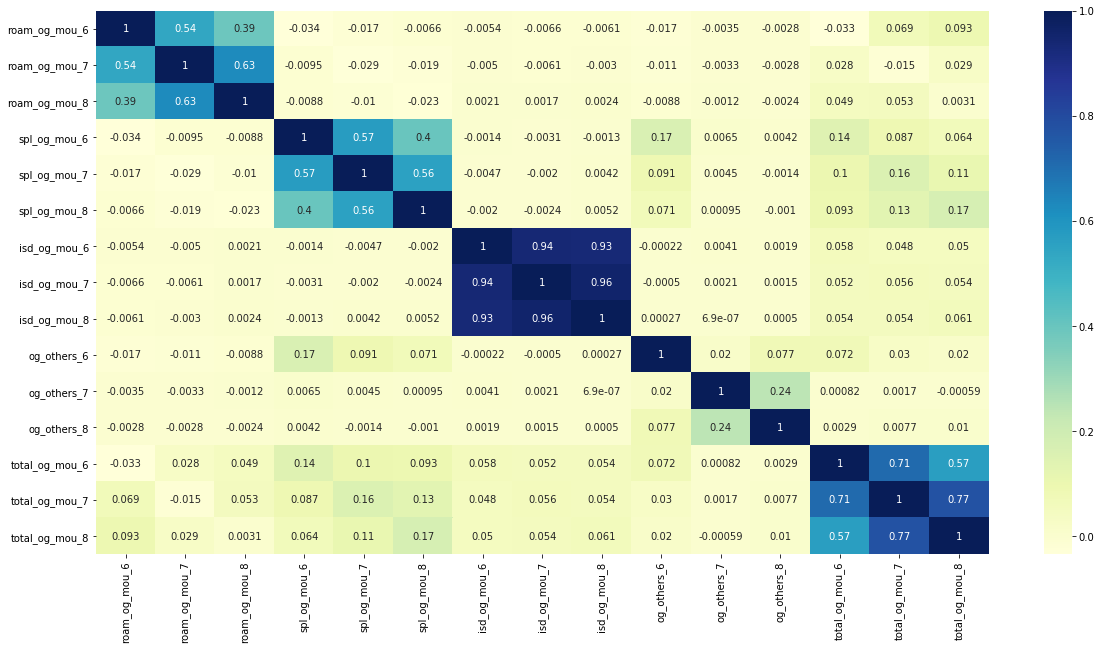

In [56]:
# plot the heatmap to observe the matrix
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

### Observations: (Derive a new feature)
- From the correlation-coefficients, it can be seen that spl, og_others and isd has no impact won total_og variables.
These variables can be safely droped or a new column can be created to show the feature availability for a customer.

## Bi-variate analysis (incoming columns)

### Understand the relationship between total vs roam, spl,  isd & og_others

In [57]:
bi_var_cols = filter_columns_with_prefix(telecom_data_hv, 'roam_ic')
bi_var_cols = bi_var_cols + filter_columns_with_prefix(telecom_data_hv, 'spl_ic')
bi_var_cols = bi_var_cols + filter_columns_with_prefix(telecom_data_hv, 'isd_ic')
bi_var_cols = bi_var_cols + filter_columns_with_prefix(telecom_data_hv, 'ic_others')
bi_var_cols = bi_var_cols + filter_columns_with_prefix(telecom_data_hv, 'total_ic')

print('columns for correlation analysis', bi_var_cols)

columns for correlation analysis ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']


In [58]:
corr = telecom_data_hv[bi_var_cols].corr()
corr

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
roam_ic_mou_6,1.000000,0.497147,0.377480,-0.031038,-0.008170,-0.001405,-0.005290,-0.003362,-0.000041,-0.006759,0.003093,0.000188,-0.023180,0.044536,0.062960
roam_ic_mou_7,0.497147,1.000000,0.647301,-0.005412,-0.013976,-0.013451,0.008831,-0.007733,0.003323,0.002238,-0.006222,-0.006121,0.036912,-0.015674,0.022476
roam_ic_mou_8,0.377480,0.647301,1.000000,-0.009453,-0.009318,-0.023439,0.014334,0.007528,0.007007,0.004618,-0.000120,-0.006486,0.036745,0.019240,-0.011918
spl_ic_mou_6,-0.031038,-0.005412,-0.009453,1.000000,0.538751,0.139126,0.007113,0.003436,0.001278,0.032500,0.030670,0.028905,0.029605,0.014104,0.009748
spl_ic_mou_7,-0.008170,-0.013976,-0.009318,0.538751,1.000000,0.066393,0.001294,0.002116,0.007685,0.015448,0.012631,0.026635,-0.015734,-0.002839,0.004531
spl_ic_mou_8,-0.001405,-0.013451,-0.023439,0.139126,0.066393,1.000000,-0.011605,-0.000359,0.002718,0.010266,0.016377,0.015922,-0.047523,-0.039797,-0.023902
isd_ic_mou_6,-0.005290,0.008831,0.014334,0.007113,0.001294,-0.011605,1.000000,0.772581,0.482028,0.123727,0.167688,0.076182,0.268762,0.214055,0.143983
isd_ic_mou_7,-0.003362,-0.007733,0.007528,0.003436,0.002116,-0.000359,0.772581,1.000000,0.700166,0.106225,0.175227,0.121371,0.228631,0.283367,0.207739
isd_ic_mou_8,-0.000041,0.003323,0.007007,0.001278,0.007685,0.002718,0.482028,0.700166,1.000000,0.089583,0.139683,0.148670,0.163136,0.214321,0.270293
ic_others_6,-0.006759,0.002238,0.004618,0.032500,0.015448,0.010266,0.123727,0.106225,0.089583,1.000000,0.749329,0.692225,0.115668,0.094878,0.076282


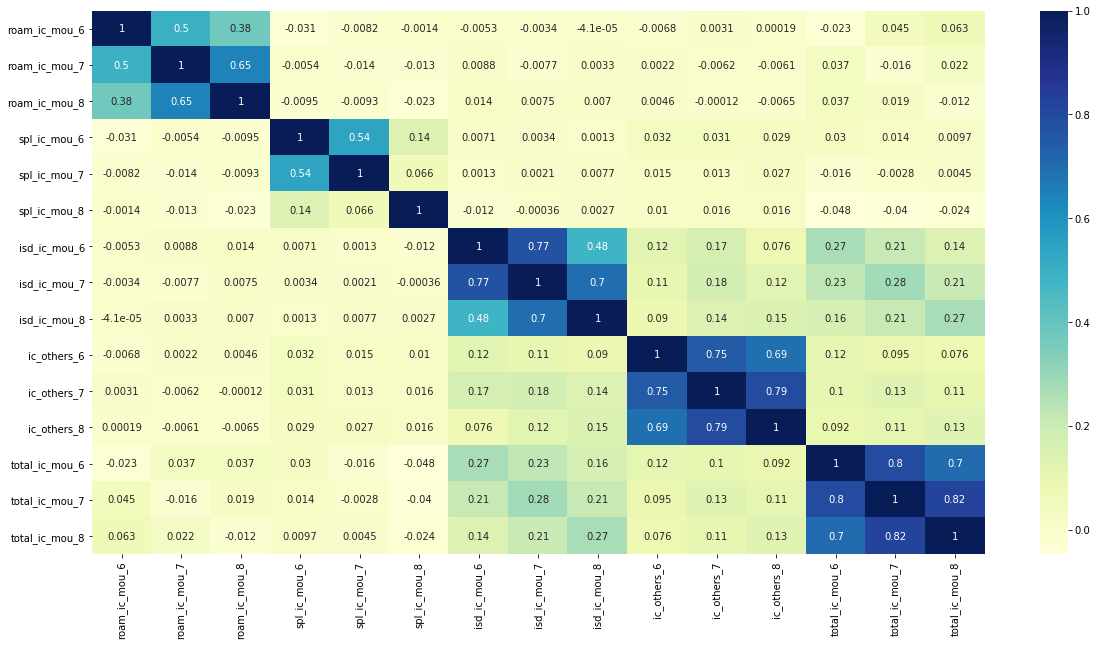

In [59]:
# plot the heatmap to observe the matrix
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

### Observations: ( Derive a new feature)

- For incoming calls we can see isd, spl and roam has almost no relationship on total_ic.  These columns can be dropped and a new feature columns can be created.

### Drop columns where data has less variance and create a new feature for further analysis

In [60]:
## derive new columns with prefix roam
cols_to_drop = filter_columns_with_prefix(telecom_data_hv, 'roam')
cols_to_drop

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8']

In [61]:
telecom_data_hv['roam_any_6'] = telecom_data_hv[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1)
telecom_data_hv['roam_any_7'] = telecom_data_hv[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1)
telecom_data_hv['roam_any_8'] = telecom_data_hv[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1)

telecom_data_test['roam_any_6'] = telecom_data_test[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1)
telecom_data_test['roam_any_7'] = telecom_data_test[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1)
telecom_data_test['roam_any_8'] = telecom_data_test[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1)

telecom_data_hv['roam_any_6'] = telecom_data_hv['roam_any_6'].apply(lambda x: 1 if (x>0) else 0)
telecom_data_hv['roam_any_7'] = telecom_data_hv['roam_any_7'].apply(lambda x: 1 if (x>0) else 0)
telecom_data_hv['roam_any_8'] = telecom_data_hv['roam_any_8'].apply(lambda x: 1 if (x>0) else 0)

telecom_data_test['roam_any_6'] = telecom_data_test['roam_any_6'].apply(lambda x: 1 if (x>0) else 0)
telecom_data_test['roam_any_7'] = telecom_data_test['roam_any_7'].apply(lambda x: 1 if (x>0) else 0)
telecom_data_test['roam_any_8'] = telecom_data_test['roam_any_8'].apply(lambda x: 1 if (x>0) else 0)

telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

In [62]:
# Check for data set with new column
telecom_data_hv.head()

,id,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8
4,4,240.708,128.191,101.565,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25,10,30,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0,1,0,0
15,15,580.549,377.294,338.286,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,150,250,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,806.0,0,0,0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,110,50,30,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,0.0,0.00,0.00,0,1420.0,990.0,494.0,0,0,0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.00,0.36,252.48,257.74,129.73,0.0,0.0,0.0,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,52.49,37.84,19.14,170.61,106.71,150.73,0.00,1.53,1.13,223.11,146.09,171.01,0.0,0.0,0.0,6.96,9.54,21.93,0.00,0.00,0.0,6.96,9.54,21.93,230.08,155.64,192.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110,0,30,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,0.0,0.00,0.00,0,463.0,519.0,263.0,0,0,0
27,27,390.489,350.985,421.300,8.58,11.48,12.68,96.91,149.44,157.23,33.71,9.28,25.59,0.0,0.00,0.00,139.21,170.21,195.51,0.0,0.0,0.0,2.53,0.00,0.00,0.0,0.0,0.00,2.53,0.00

### Derive new feature for local variable as outgoing and incoming variable are already captured

- local outgoing and local incoming columns are available as part of total_og and total_oc

In [63]:
#### Derive new feature for local loc variable
cols_to_drop = filter_columns_with_prefix(telecom_data_hv, 'loc')
cols_to_drop

['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8']

In [64]:
## train data set
telecom_data_hv['local_any_6'] = telecom_data_hv[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1)
telecom_data_hv['local_any_7'] = telecom_data_hv[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1)
telecom_data_hv['local_any_8'] = telecom_data_hv[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1)

telecom_data_hv['local_any_6'] = telecom_data_hv['local_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['local_any_7'] = telecom_data_hv['local_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['local_any_8'] = telecom_data_hv['local_any_8'].apply(lambda x: 1 if (x > 0) else 0)

## test data set
telecom_data_test['local_any_6'] = telecom_data_test[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1)
telecom_data_test['local_any_7'] = telecom_data_test[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1)
telecom_data_test['local_any_8'] = telecom_data_test[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1)

telecom_data_test['local_any_6'] = telecom_data_test['local_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['local_any_7'] = telecom_data_test['local_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['local_any_8'] = telecom_data_test['local_any_8'].apply(lambda x: 1 if (x > 0) else 0)

telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

In [65]:
#Check the dataset if columns are dropped
telecom_data_hv.head()

,id,arpu_6,arpu_7,arpu_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8
4,4,240.708,128.191,101.565,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25,10,30,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0,1,0,0,1,1,1
15,15,580.549,377.294,338.286,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,150,250,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,806.0,0,0,0,1,1,1
23,23,1130.948,905.506,479.762,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,110,50,30,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,0.0,0.00,0.00,0,1420.0,990.0,494.0,0,0,0,1,1,1
24,24,371.974,352.069,240.449,0.0,0.0,0.0,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,0.0,0.0,0.0,6.96,9.54,21.93,0.00,0.00,0.0,6.96,9.54,21.93,230.08,155.64,192.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110,0,30,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,0.0,0.00,0.00,0,463.0,519.0,263.0,0,0,0,1,1,1
27,27,390.489,350.985,421.300,0.0,0.0,0.0,2.53,0.00,0.00,0.0,0.0,0.00,2.53,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,141.74,170.21,195.51,0.0,0.0,0.4,0.00,0.00,0.00,15.43,0.00,0.0,15.43,0.00,0.40,283.48,366.03,350.86,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110,200,61,5.99,92.93,10.54,374.7,275.38,1342.93,79.35,86.55,161.92,0.18,69.20,161.92,3,1,1,0,0,1,0,1,1,573,700.4,185.71,173.72,0,1385.0,1180.0,892.0,0,0,0,1,1,1


In [66]:
telecom_data_hv.describe()

,id,arpu_6,arpu_7,arpu_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8
count,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,34994.28687,558.458938,558.729577,506.861525,167.718213,174.642057,148.937645,182.149011,189.504849,159.357025,1.777167,1.723604,1.556160,351.648161,365.874228,309.854140,2.328080,2.223897,2.131623,5.881578,7.142102,6.664491,0.677791,0.031526,0.056129,613.537764,627.973145,552.317695,14.443160,15.224972,13.804982,28.902475,30.522658,27.440724,2.728228,2.771310,2.493205,46.077431,48.522569,43.742281,287.787659,292.924786,277.470625,0.061762,0.018935,0.027204,10.468669,11.48473,10.954235,1.201958,1.538401,1.259529,101.260315,99.676534,91.618903,126.089883,125.276709,106.343710,345.925480,370.464757,352.390969,67.151313,68.337088,62.469334,63.543080,64.522125,58.176940,1.059963,1.215486,1.054109,0.216866,0.226669,0.208918,0.210965,0.231523,0.205111,1210.525627,168.380424,176.041281,158.458135,0.082758,1115.569710,1189.251455,1045.320356,0.223861,0.177224,0.185552,0.962071,0.965022,0.929425
std,20144.16597,474.147345,494.844437,519.951307,408.183765,426.875943,401.343010,408.749840,429.477039,406.346462,12.217256,12.422015,10.552672,611.175972,639.624722,608.029079,53.015634,52.077796,51.945516,18.244250,23.339580,21.568605,4.716612,1.674748,3.075443,693.522264,716.062954,701.300396,69.852284,81.491922,68.475004,93.122655,103.054061,94.041999,19.876127,18.010638,19.031338,128.777147,146.289752,130.289677,360.568233,363.792261,352.951653,0.198378,0.140968,0.106657,76.700313,73.41078,69.987386,15.965565,17.293807,14.269831,144.909090,139.758428,138.974780,329.293974,328.065807,317.134638,929.742513,940.994697,938.777397,179.346219,182.840366,171.761301,159.658099,166.591318,154.083124,2.497785,2.763354,2.54075

### Derive new feature for std variable as outgoing and incoming variable are already captured

- std (og & ic) calls are already captured as part of total_og and total_ic

In [67]:
#### Derive new feature for local loc variable
cols_to_drop = filter_columns_with_prefix(telecom_data_hv, 'std')
cols_to_drop

['std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8']

In [68]:
## train dataset
telecom_data_hv['std_any_6'] = telecom_data_hv[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1)
telecom_data_hv['std_any_7'] = telecom_data_hv[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1)
telecom_data_hv['std_any_8'] = telecom_data_hv[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1)

telecom_data_hv['std_any_6'] = telecom_data_hv['std_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['std_any_7'] = telecom_data_hv['std_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['std_any_8'] = telecom_data_hv['std_any_8'].apply(lambda x: 1 if (x > 0) else 0)


## test data set
telecom_data_test['std_any_6'] = telecom_data_test[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1)
telecom_data_test['std_any_7'] = telecom_data_test[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1)
telecom_data_test['std_any_8'] = telecom_data_test[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1)

telecom_data_test['std_any_6'] = telecom_data_test['std_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['std_any_7'] = telecom_data_test['std_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['std_any_8'] = telecom_data_test['std_any_8'].apply(lambda x: 1 if (x > 0) else 0)


telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

In [69]:
#Check the dataset if columns are dropped
telecom_data_hv.head()

,id,arpu_6,arpu_7,arpu_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8
4,4,240.708,128.191,101.565,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25,10,30,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0,1,0,0,1,1,1,1,0,0
15,15,580.549,377.294,338.286,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,150,250,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,806.0,0,0,0,1,1,1,0,1,1
23,23,1130.948,905.506,479.762,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,110,50,30,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,0.0,0.00,0.00,0,1420.0,990.0,494.0,0,0,0,1,1,1,1,0,0
24,24,371.974,352.069,240.449,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,230.08,155.64,192.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110,0,30,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,0.0,0.00,0.00,0,463.0,519.0,263.0,0,0,0,1,1,1,1,1,1
27,27,390.489,350.985,421.300,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,141.74,170.21,195.51,283.48,366.03,350.86,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,110,200,61,5.99,92.93,10.54,374.7,275.38,1342.93,79.35,86.55,161.92,0.18,69.20,161.92,3,1,1,0,0,1,0,1,1,573,700.4,185.71,173.72,0,1385.0,1180.0,892.0,0,0,0,1,1,1,1,0,1


### Derive new feature combing isd, spl, og and ic
- These columns are already captured as part of total incoming, outgoing and most of the columns has very less variance. We can create a new feature and then perform univariate analysis to understand the impact on churn

In [70]:
cols_to_drop_isd =  filter_columns_with_prefix(telecom_data_hv, 'isd')
cols_to_drop_spl =  filter_columns_with_prefix(telecom_data_hv, 'spl')
cols_to_drop_og  =  filter_columns_with_prefix(telecom_data_hv, 'og_others')
cols_to_drop_ic  =  filter_columns_with_prefix(telecom_data_hv, 'ic_others')

cols_to_drop = cols_to_drop_isd + cols_to_drop_spl + cols_to_drop_og + cols_to_drop_ic

print('\nColumns starting with isd\n', cols_to_drop_isd)
print('\nColumns starting with spl\n', cols_to_drop_spl)
print('\nColumns starting with og\n', cols_to_drop_og)
print('\nColumns starting with ic\n', cols_to_drop_ic)


Columns starting with isd
 ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8']

Columns starting with spl
 ['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8']

Columns starting with og
 ['og_others_6', 'og_others_7', 'og_others_8']

Columns starting with ic
 ['ic_others_6', 'ic_others_7', 'ic_others_8']


In [71]:
## train data
telecom_data_hv['spl_any_6'] = telecom_data_hv[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1)
telecom_data_hv['spl_any_7'] = telecom_data_hv[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1)
telecom_data_hv['spl_any_8'] = telecom_data_hv[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1)

telecom_data_hv['spl_any_6'] = telecom_data_hv['spl_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['spl_any_7'] = telecom_data_hv['spl_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_hv['spl_any_8'] = telecom_data_hv['spl_any_8'].apply(lambda x: 1 if (x > 0) else 0)

#test data
telecom_data_test['spl_any_6'] = telecom_data_test[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1)
telecom_data_test['spl_any_7'] = telecom_data_test[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1)
telecom_data_test['spl_any_8'] = telecom_data_test[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1)

telecom_data_test['spl_any_6'] = telecom_data_test['spl_any_6'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['spl_any_7'] = telecom_data_test['spl_any_7'].apply(lambda x: 1 if (x > 0) else 0)
telecom_data_test['spl_any_8'] = telecom_data_test['spl_any_8'].apply(lambda x: 1 if (x > 0) else 0)

telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

In [72]:
#Check the dataset if columns are dropped
telecom_data_hv.head()

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8
4,4,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,25,10,30,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0,1,0,0,1,1,1,1,0,0,0,1,0
15,15,580.549,377.294,338.286,327.64,366.79,391.53,233.18,777.39,629.94,0,150,250,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,806.0,0,0,0,1,1,1,0,1,1,1,0,0
23,23,1130.948,905.506,479.762,1152.99,822.83,387.81,598.54,448.36,203.29,110,50,30,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,0.0,0.00,0.00,0,1420.0,990.0,494.0,0,0,0,1,1,1,1,0,0,1,1,1
24,24,371.974,352.069,240.449,624.38,546.06,251.89,230.08,155.64,192.94,110,0,30,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,0.0,0.00,0.00,0,463.0,519.0,263.0,0,0,0,1,1,1,1,1,1,0,0,1
27,27,390.489,350.985,421.300,141.74,170.21,195.51,283.48,366.03,350.86,110,200,61,5.99,92.93,10.54,374.7,275.38,1342.93,79.35,86.55,161.92,0.18,69.20,161.92,3,1,1,0,0,1,0,1,1,573,700.4,185.71,173.72,0,1385.0,1180.0,892.0,0,0,0,1,1,1,1,0,1,0,0,0


### Derive new columns for volume data to  show the total data usages

- For volume usages, customers need to recharge the data, lets capture this as part of another feature and drop the variable


In [73]:
cols_to_drop_vol = filter_columns_with_prefix(telecom_data_hv, 'vol')
cols_to_drop_vbc = filter_columns_with_keyword(telecom_data_hv, 'vbc')

cols_to_drop = cols_to_drop_vol + cols_to_drop_vbc

print('\nColumns starting with vol\n', cols_to_drop_vol)
print('\nColumns with keyword vbc\n', cols_to_drop_vbc)


Columns starting with vol
 ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']

Columns with keyword vbc
 ['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']


In [74]:
# train data
telecom_data_hv['data_used_6'] = telecom_data_hv[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
telecom_data_hv['data_used_7'] = telecom_data_hv[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
telecom_data_hv['data_used_8'] = telecom_data_hv[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)

#test data
telecom_data_test['data_used_6'] = telecom_data_test[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
telecom_data_test['data_used_7'] = telecom_data_test[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
telecom_data_test['data_used_8'] = telecom_data_test[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)

telecom_data_hv.drop(cols_to_drop, axis=1, inplace = True)
telecom_data_test.drop(cols_to_drop, axis=1, inplace = True)

In [75]:
telecom_data_hv.head()

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
4,4,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,25,10,30,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,0,1515.0,1473.0,974.0,1,0,0,1,1,1,1,0,0,0,1,0,390.80,308.89,213.47
15,15,580.549,377.294,338.286,327.64,366.79,391.53,233.18,777.39,629.94,0,150,250,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,0,808.0,400.0,806.0,0,0,0,1,1,1,0,1,1,1,0,0,260.42,0.00,354.35
23,23,1130.948,905.506,479.762,1152.99,822.83,387.81,598.54,448.36,203.29,110,50,30,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,0,1420.0,990.0,494.0,0,0,0,1,1,1,1,0,0,1,1,1,0.00,0.00,0.00
24,24,371.974,352.069,240.449,624.38,546.06,251.89,230.08,155.64,192.94,110,0,30,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,0,463.0,519.0,263.0,0,0,0,1,1,1,1,1,1,0,0,1,0.04,0.00,0.00
27,27,390.489,350.985,421.300,141.74,170.21,195.51,283.48,366.03,350.86,110,200,61,79.35,86.55,161.92,0.18,69.20,161.92,3,1,1,0,0,1,0,1,1,573,0,1385.0,1180.0,892.0,0,0,0,1,1,1,1,0,1,0,0,0,554.41,554.02,2053.87


In [76]:
# Check the dataset shape
telecom_data_hv.shape

(21013, 48)

In [77]:
telecom_data_hv.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
count,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,34994.28687,558.458938,558.729577,506.861525,613.537764,627.973145,552.317695,287.787659,292.924786,277.470625,101.260315,99.676534,91.618903,67.151313,68.337088,62.469334,63.543080,64.522125,58.176940,1.059963,1.215486,1.054109,0.216866,0.226669,0.208918,0.210965,0.231523,0.205111,1210.525627,0.082758,1115.569710,1189.251455,1045.320356,0.223861,0.177224,0.185552,0.962071,0.965022,0.929425,0.858469,0.855375,0.819160,0.755009,0.739114,0.714320,630.473498,671.782746,627.115103
std,20144.16597,474.147345,494.844437,519.951307,693.522264,716.062954,701.300396,360.568233,363.792261,352.951653,144.909090,139.758428,138.974780,179.346219,182.840366,171.761301,159.658099,166.591318,154.083124,2.497785,2.763354,2.540754,0.604206,0.651967,0.614132,0.995942,1.102682,1.130963,954.831812,0.275523,1462.259715,1655.695802,1824.836271,0.416840,0.381867,0.388754,0.191029,0.183729,0.256120,0.348577,0.351730,0.384895,0.430092,0.439128,0.451749,1287.850213,1301.357041,1283.448611
min,4.00000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.370000,-26.040000,-24.490000,-15.320000,-13.090000,-24.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17599.00000,307.718000,308.673000,230.471000,116.240000,116.240000,73.240000,72.390000,78.280000,61.760000,25.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,461.000000,0.000000,546.000000,550.000000,396.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34977.00000,482.616000,479.725000,427.575000,411.690000,424.410000,334.880000,182.690000,186.560000,172.940000,67.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,854.000000,0.000000,788.000000,810.000000,685.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,79.060000,124.650000,38.520000
75%,52332.00000,700.552000,697.076000,658.704000,864.740000,890.530000,775.880000,369.710000,374.560000,360.730000,120.000000,130.000000,130.000000,35.000000,35.210000,20.010000,50.710000,47.650000,26.020000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1758.000000,0.000000,1210.000000,1266.000000,1147.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

### Univariate Analysis: Average revenue per user

- We can see from telecom_data_hv.describe() how the average revenue per user columns is distributed. 
- We can see some outliers in the data, but 99% of the data are well within range

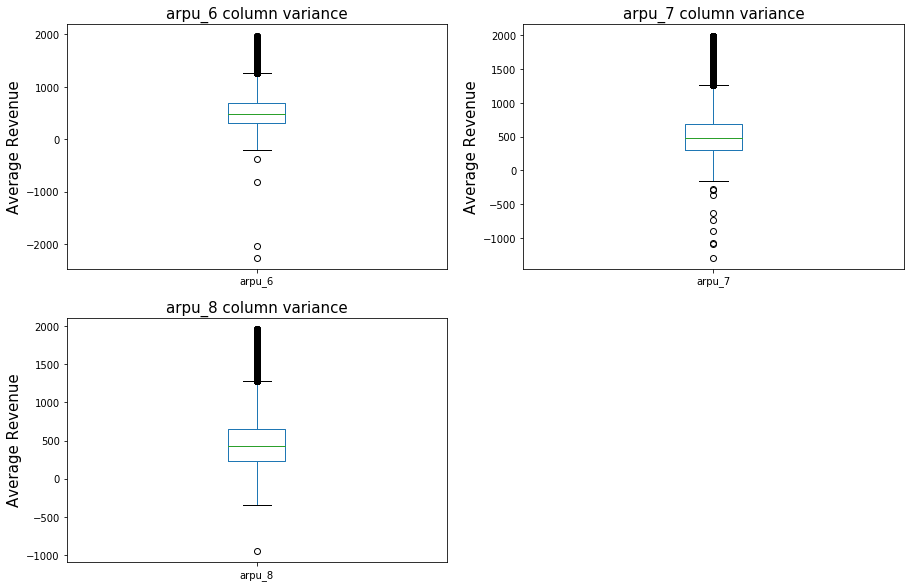

In [78]:
plt.figure(figsize=(15, 80))
box_plot_cols = ['arpu_6', 'arpu_7', 'arpu_8']
for i in enumerate(box_plot_cols):
    plt.subplot(15, 2, i[0]+1)
    ax = telecom_data_hv[(telecom_data_hv[i[1]] < telecom_data_hv[i[1]].quantile(0.99))][i[1]]
    ax1 = ax.plot.box()
    ax1.set_title(i[1] + " column variance", fontsize=15)
    ax1.set_ylabel("Average Revenue", fontsize=15)
plt.show()

### Observations
- From percentile distribution we can see data is fairly distributed, though it contains outliers but 99% of the data is well its range.

### Univariate Analysis: Total columns

In [79]:
total_columns = filter_columns_with_prefix(telecom_data_hv, 'total')
total_columns

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_6',
 'total_rech_7',
 'total_rech_8']

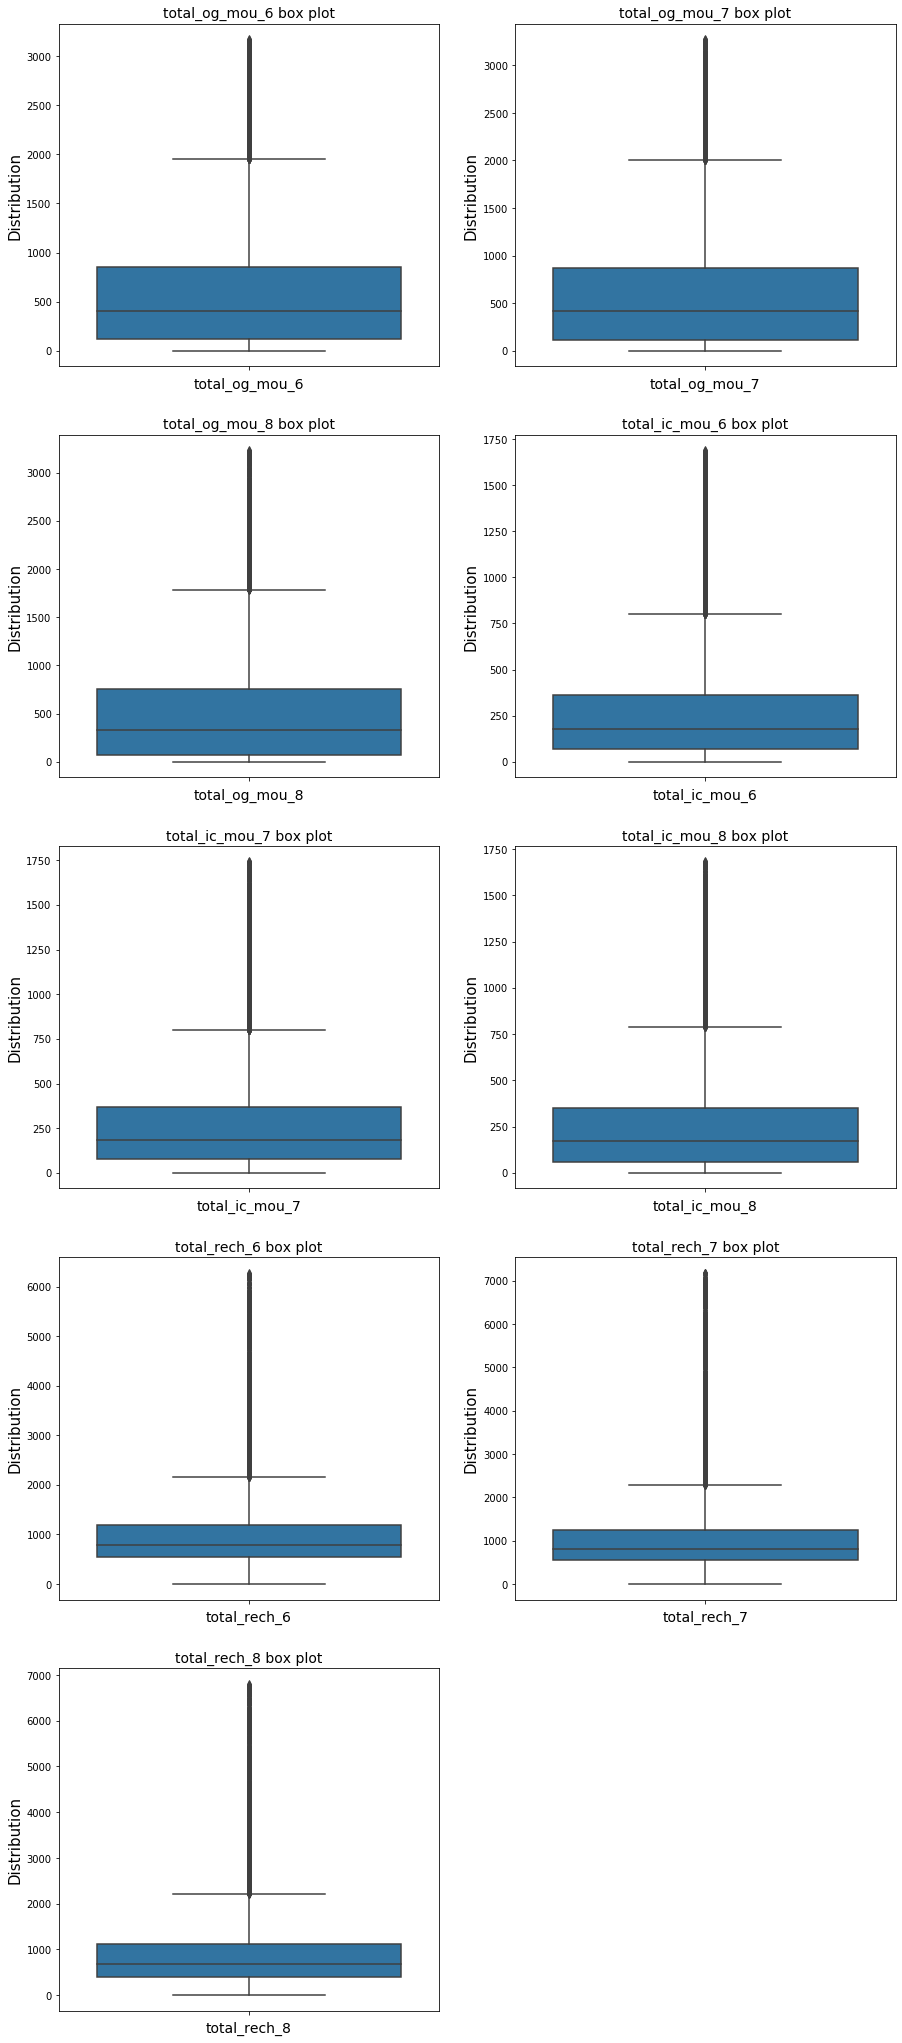

In [80]:
plt.figure(figsize=(15, 150))
for i in enumerate(total_columns):
    plt.subplot(20,2,i[0]+1)
    ax = sns.boxplot(data = telecom_data_hv[telecom_data_hv[i[1]] < telecom_data_hv[i[1]].quantile(0.99)], y=i[1])
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    ax.set_title(i[1] + " box plot", fontsize=14)
    ax.set_xlabel(i[1], fontsize=14)
    ax.set_ylabel("Distribution", fontsize=15)
plt.show()

### Univariate Analysis for feature columns (local, roam, std and spl)

In [81]:
bivariate_cols = filter_columns_with_prefix(telecom_data_hv, 'local')
bivariate_cols = bivariate_cols + filter_columns_with_prefix(telecom_data_hv, 'roam')
bivariate_cols = bivariate_cols + filter_columns_with_prefix(telecom_data_hv, 'std')
bivariate_cols = bivariate_cols + filter_columns_with_prefix(telecom_data_hv, 'spl')

print('\n Feature columns to analyze ', bivariate_cols)


 Feature columns to analyze  ['local_any_6', 'local_any_7', 'local_any_8', 'roam_any_6', 'roam_any_7', 'roam_any_8', 'std_any_6', 'std_any_7', 'std_any_8', 'spl_any_6', 'spl_any_7', 'spl_any_8']


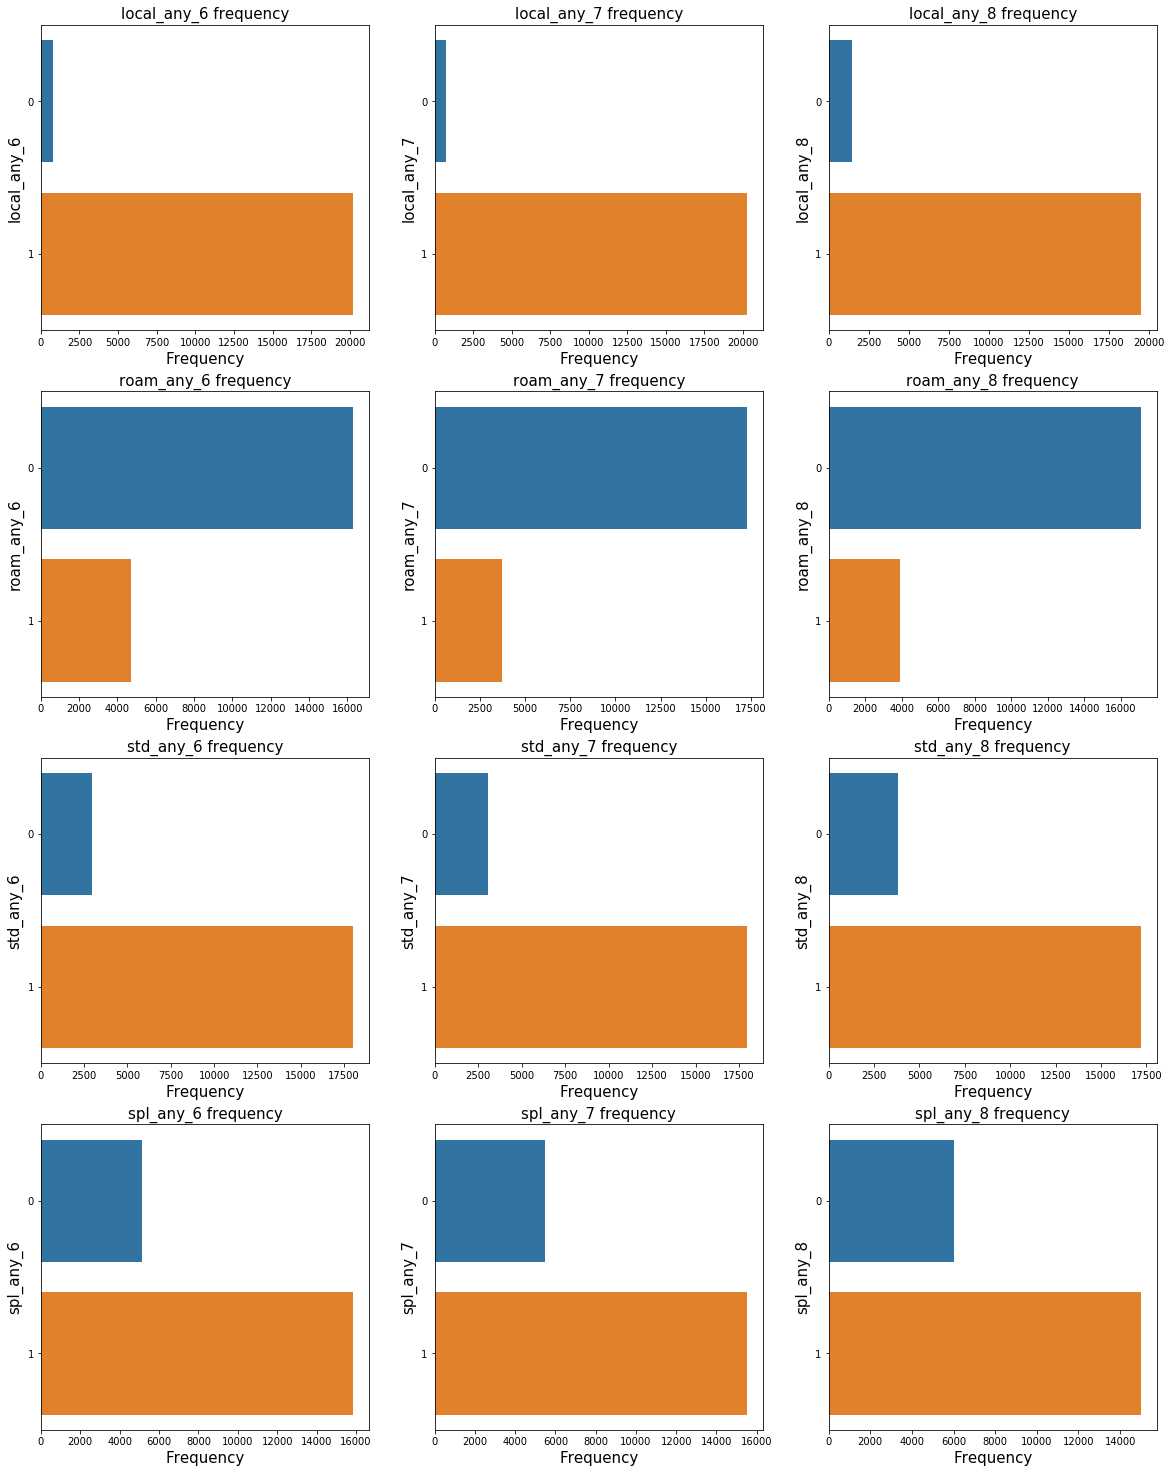

In [82]:
plt.figure(figsize=(20, 100))
for i in enumerate(bivariate_cols):
    plt.subplot(15, 3, i[0] + 1)
    #ax = sns.boxplot(data = house_pricing, x=i[1], y='SalePrice')
    ax = sns.countplot(y = i[1], data = telecom_data_hv)

    ax.set_title(i[1] + " frequency", fontsize=15)
    ax.set_xlabel("Frequency", fontsize=15)
    ax.set_ylabel(i[1], fontsize=15)
plt.show()

### Observations:

- From the count plot we can notice high value customers which are churning are mostly interested in  local, spl & std services


### Bivariate Analysis: for feature columns against churn probability

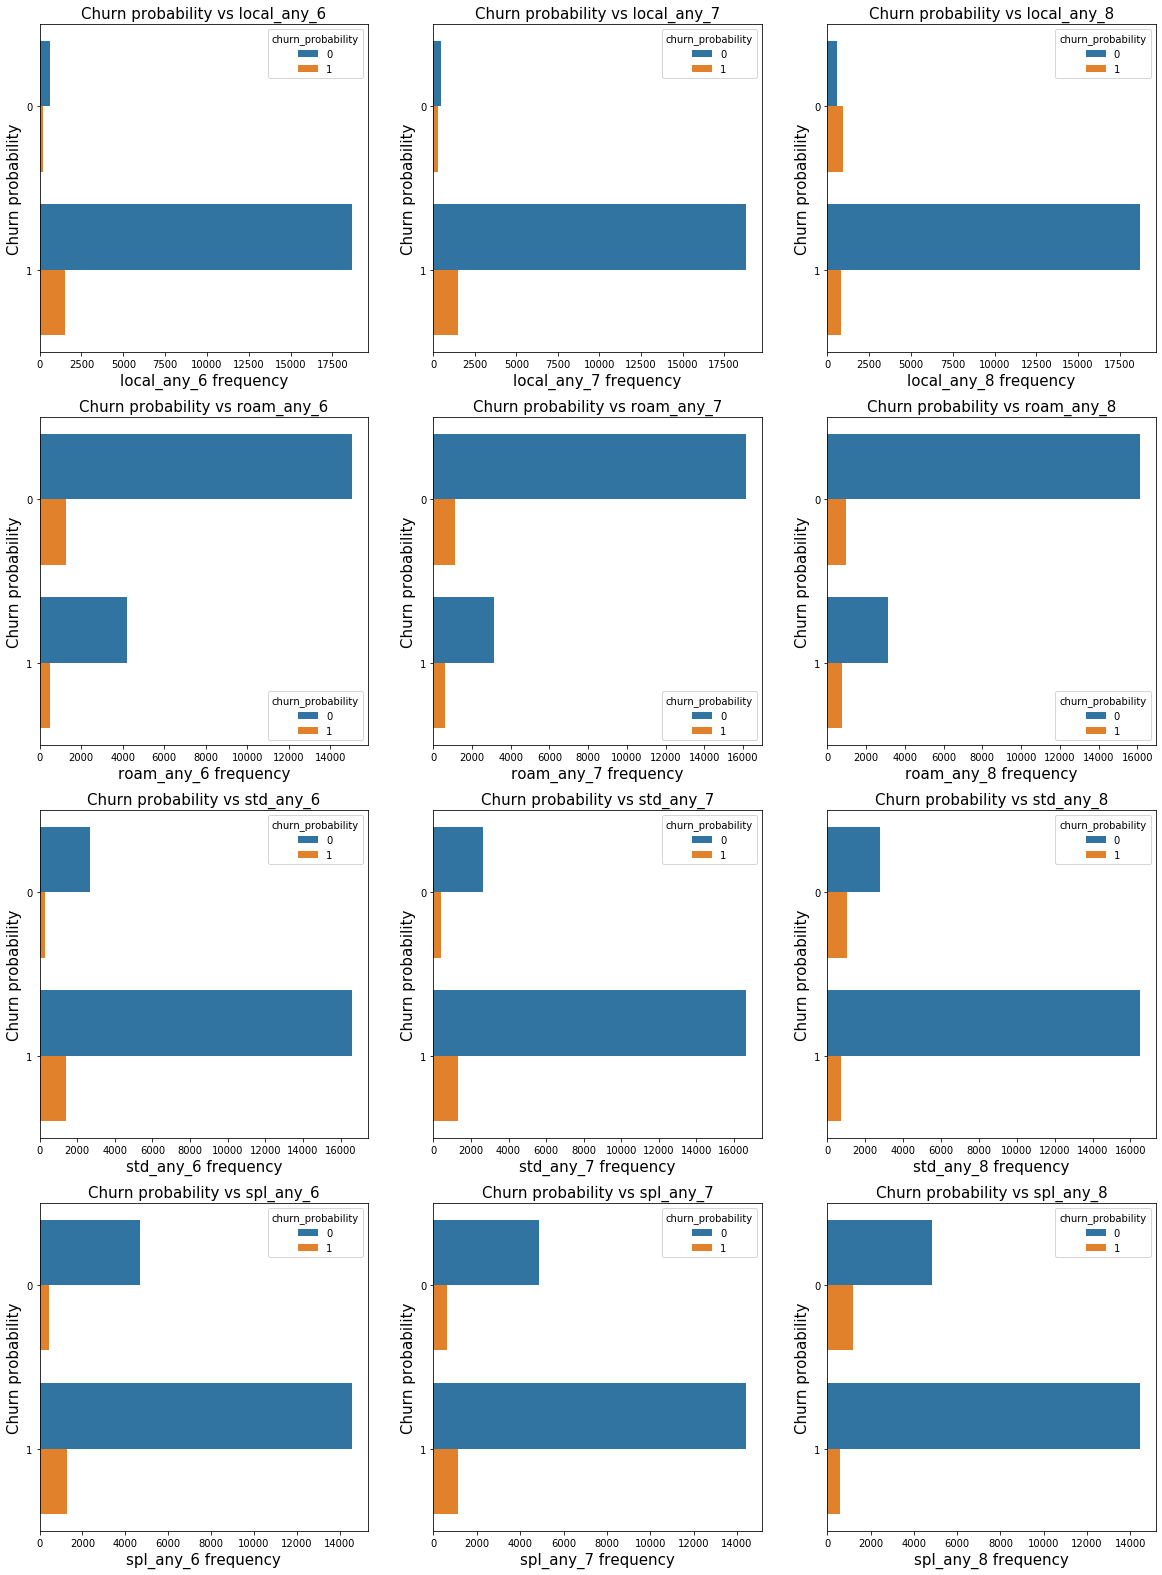

In [83]:
plt.figure(figsize=(20, 100))
for i in enumerate(bivariate_cols):
    plt.subplot(14, 3, i[0] + 1)
    #ax = sns.boxplot(data = house_pricing, x=i[1], y='SalePrice')
    ax = sns.countplot(y = i[1], hue="churn_probability", data = telecom_data_hv)

    ax.set_title("Churn probability vs " + i[1], fontsize=15)
    ax.set_xlabel(i[1] + " frequency", fontsize=15)
    ax.set_ylabel("Churn probability", fontsize=15)
plt.show()

### Observations:

- We can notice that high value customers which are churning mostly using local, std & spl services
- Roaming services are not used by high value customers

Telecom service providers can focus more on local sevrices compared to others.

### Print the correlation matrix again to analyze correlation coefficient between features

In [84]:
# correlation coefficient between important variables, filter id, roam, chun and last
corr = telecom_data_hv.loc[:,~telecom_data_hv.columns.str.contains(pat = 'id|roam|churn|last', regex = True)].corr()
corr

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
arpu_6,1.000000,0.696079,0.629072,0.542076,0.358207,0.300064,0.216304,0.160430,0.142200,0.234779,0.115834,0.134602,0.201798,0.089880,0.113378,-0.155078,-0.188235,-0.147757,0.164988,0.072039,0.095688,0.001396,-0.019813,-0.011942,0.043376,0.429607,0.215814,0.218263,0.085944,-0.013710,-0.043548,0.178675,0.121083,0.081321,0.127396,0.056267,0.039850,0.124375,0.042227,0.060185
arpu_7,0.696079,1.000000,0.781639,0.357641,0.522131,0.421338,0.131210,0.196599,0.174198,0.113476,0.238732,0.165080,0.089428,0.213966,0.146317,-0.177887,-0.147254,-0.127615,0.081413,0.183300,0.129134,-0.024256,0.015683,0.007858,0.035135,0.263448,0.416167,0.302761,-0.008502,0.094509,0.079597,0.112285,0.182614,0.158327,0.044956,0.118306,0.100834,0.042333,0.132030,0.100743
arpu_8,0.629072,0.781639,1.000000,0.268007,0.389516,0.544783,0.134389,0.183929,0.242137,0.110471,0.148274,0.274100,0.091444,0.132138,0.249347,-0.147869,-0.132429,-0.074569,0.078797,0.116142,0.216977,-0.015469,0.005049,0.053356,0.069375,0.242184,0.300686,0.452393,-0.004074,0.075351,0.194410,0.097882,0.149501,0.234065,0.040750,0.085262,0.177224,0.054304,0.086097,0.181226
total_og_mou_6,0.542076,0.357641,0.268007,1.000000,0.710142,0.566617,0.170750,0.107080,0.080547,-0.124695,-0.127806,-0.110608,-0.138212,-0.136223,-0.118691,-0.188861,-0.196702,-0.158722,-0.116922,-0.121227,-0.105533,-0.080099,-0.075683,-0.068278,-0.027464,0.078132,-0.016372,-0.009022,0.172792,0.083773,-0.025885,0.283303,0.230455,0.149689,0.158108,0.092614,0.048157,-0.183537,-0.196943,-0.172968
total_og_mou_7,0.358207,0.522131,0.389516,0.710142,1.000000,0.774151,0.073823,0.153202,0.117430,-0.139012,-0.127778,-0.109625,-0.152096,-0.133321,-0.117580,-0.201529,-0.183076,-0.149006,-0.128620,-0.116343,-0.105128,-0.087600,-0.079379,-0.063982,-0.039970,-0.002001,0.048522,0.032908,0.062904,0.165728,0.107783,0.217521,0.289116,0.246007,0.065674,0.154800,0.122121,-0.196790,-0.196048,-0.170241
total_og_mou_8,0.300064,0.421338,0.544783,0.566617,0.774151,1.000000,0.078531,0.136830,0.202268,-0.109811,-0.092265,-0.063581,-0.120004,-0.097554,-0.069679,-0.171906,-0.155840,-0.112443,-0.103323,-0.086826,-0.064915,-0.069362,-0.055662,-0.038307,-0.000938,0.004752,0.049035,0.126842,0.034456,0.126211,0.215718,0.177818,0.239925,0.309260,0.046142,0.112353,0.202359,-0.153593,-0.148884,-0.115301
total_ic_mou_6,0.216304,0.131210,0.134389,0.170750,0.073823,0.078531,1.000000,0.797414,0.703119,0.008468,0.003823,0.020735,-0.004875,-0.011092,0.008994,-0.081437,-0.096015,-0.072492,0.000879,-0.001864,0.017658,-0.029815,-0.039530,-0.028650,0.158330,0.039710,-0.008057,0.015301,0.157286,0.103680,0.077037,0.164004,0.131892,0.121645,0.143966,0.087804,0.094915,-0.013268,-0.023577,-0.007319
total_ic_mou_7,0.160430,0.196599,0.183929,0.107080,0.153202,0.136830,0.797414,1.000000,0.822121,0.004650,0.015177,0.031907,-0.007163,0.003146,0.022322,-0.096360,-0.094355,-0.074096,-0.003575,0.010627,0.026930,-0.033662,-0.034755,-0.027401,0.156752,0.010490,0.022503,0.035673,0.114972,0.150673,0.149504,0.135759,0.173252,0.174361,0.097676,0.130103,0.136224,-0.018229,-0.010846,0.006456
total_ic_mou_8,0.142200,0.174198,0.242137,0.080547,0.117430,0.202268,0.703119,0.822121,1.000000,0.008902,0.020894,0.048520,-0.000914,0.011224,0.037571,-0.092382,-0.085419,-0.055502,0.004889,0.018953,0.043517,-0.029899,-0.029091,-0.017530,0.167563,0.008975,0.025949,0.067772,0.100167,0.134226,0.215963,0.119246,0.149669,0.224500,0.081262,0.106185,0.183496,-0.010843,-0.000665,0.026458
arpu_3g_6,0.234779,0.113476,0.110471,-0.124695,-0.139012,-0.109811,0.008468,0.004

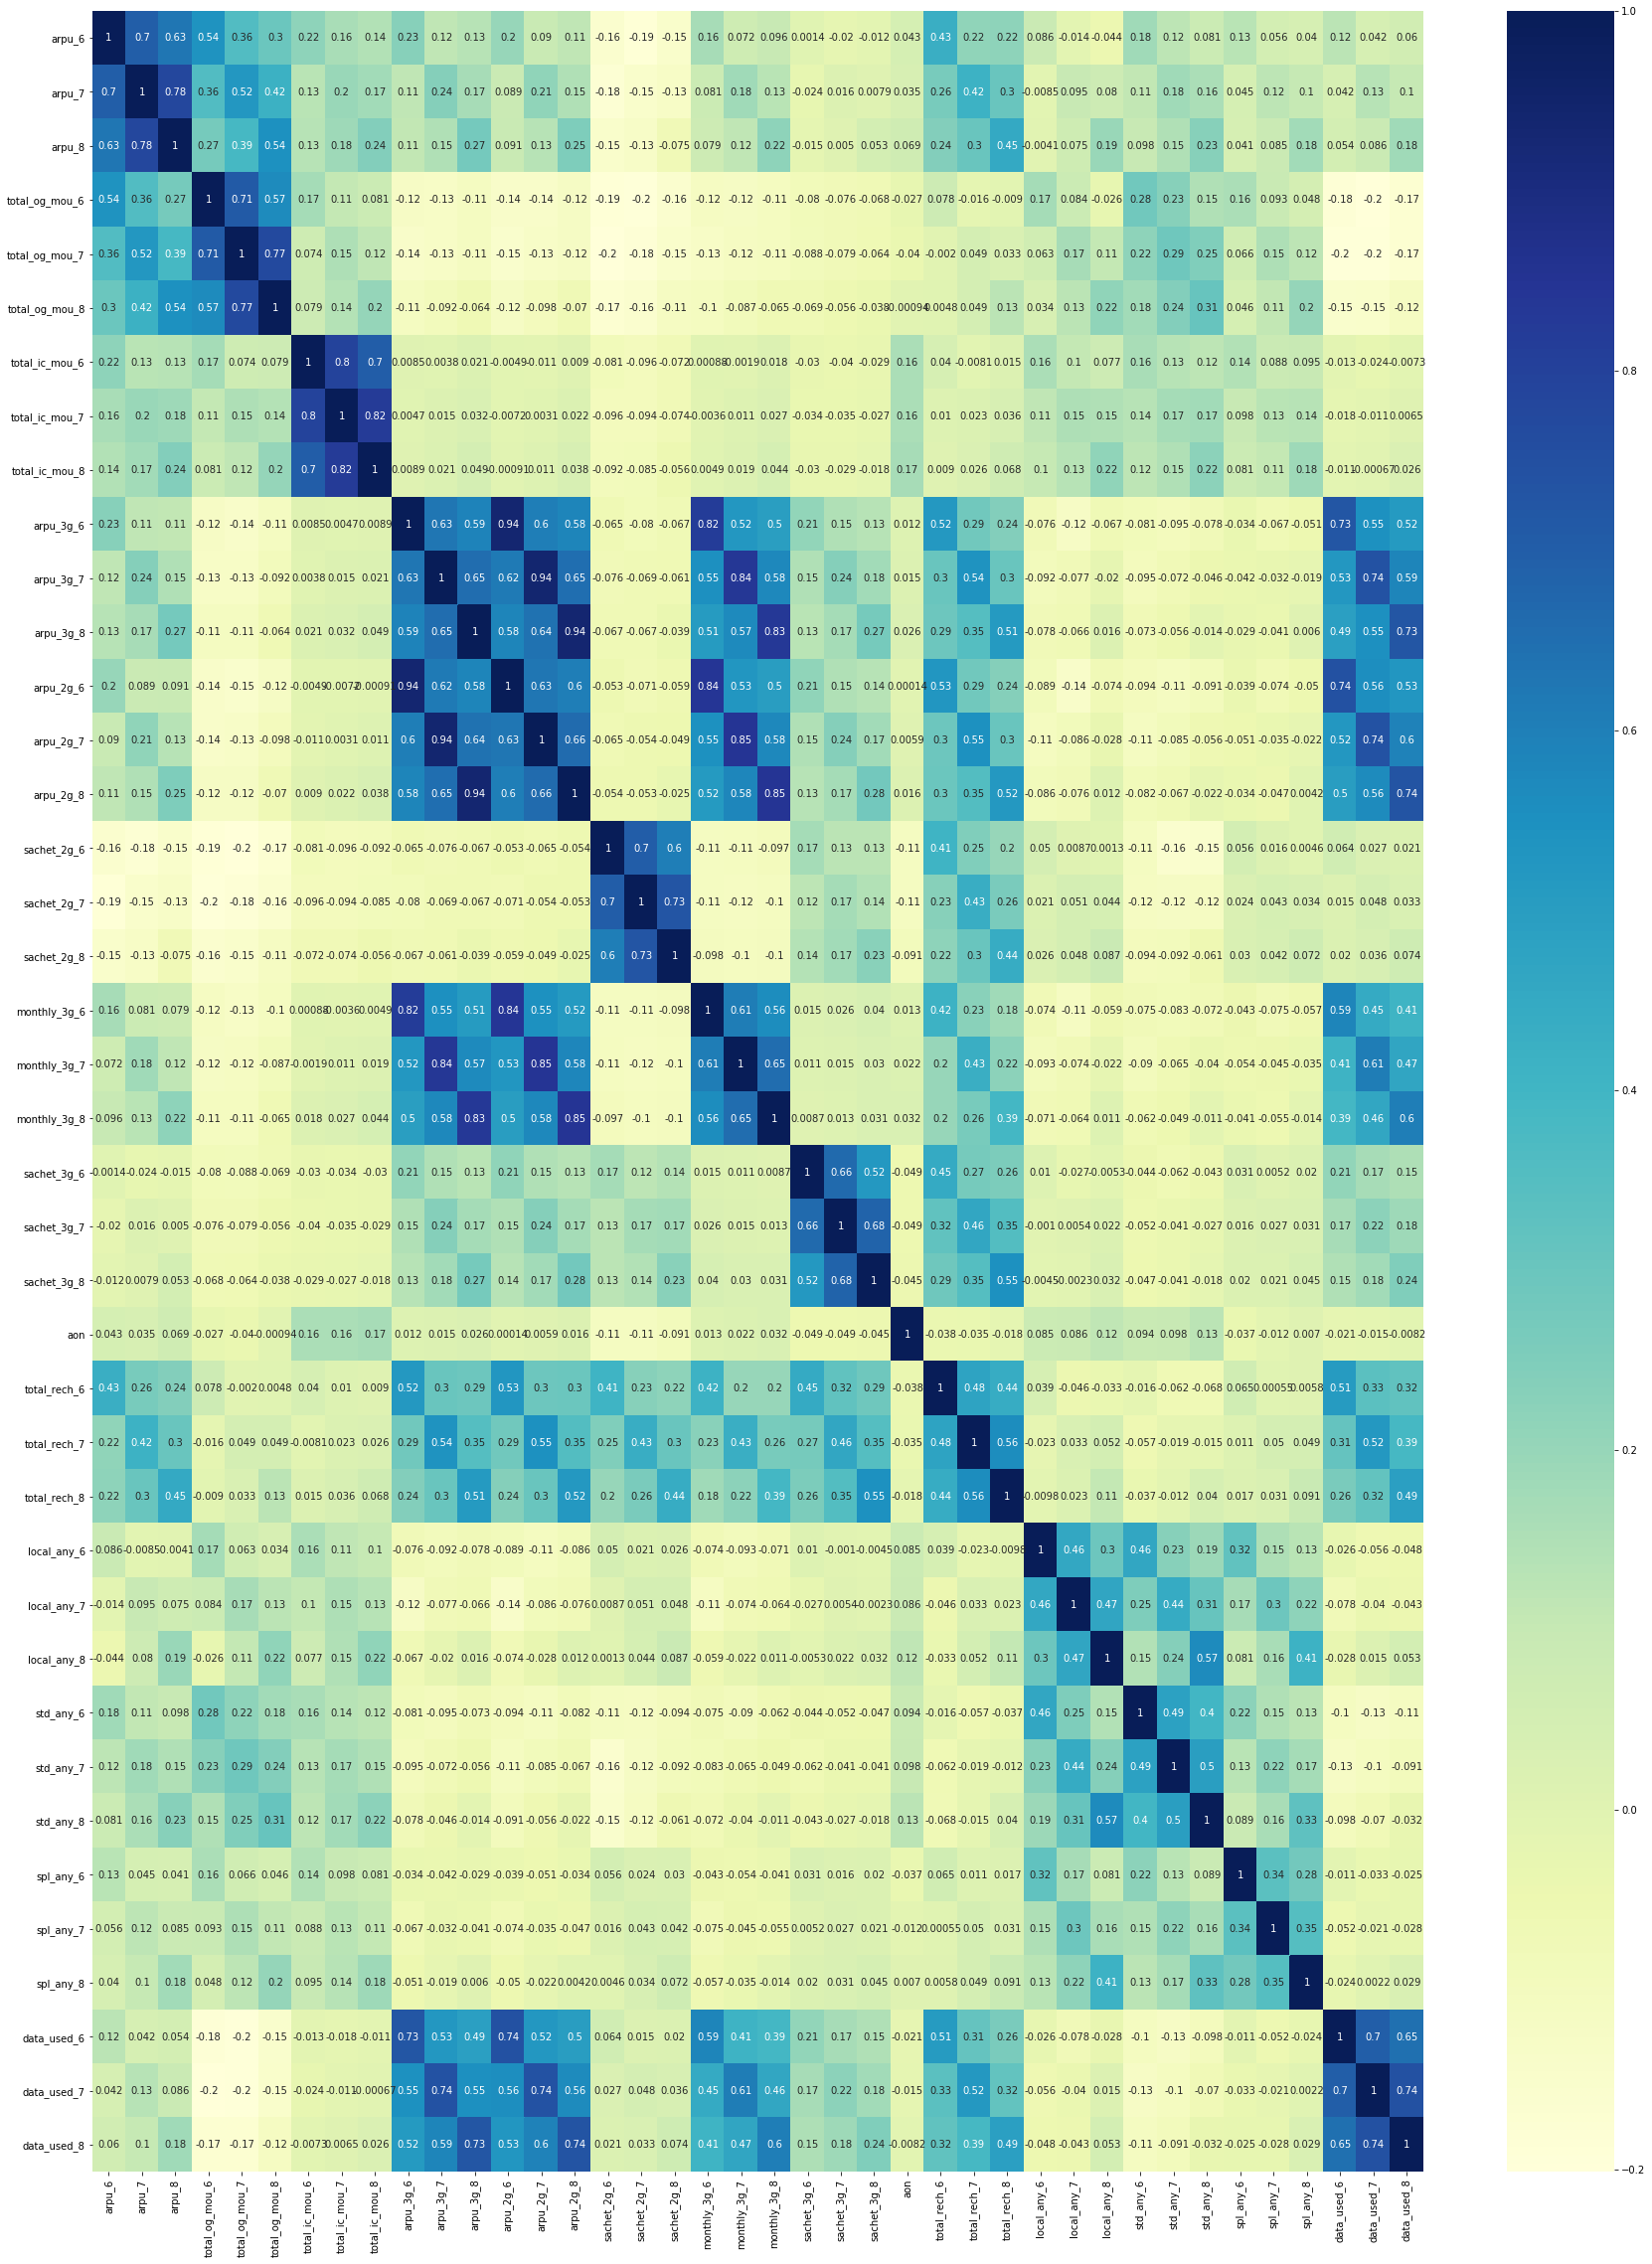

In [85]:
# plot the heatmap to observe the matrix
plt.figure(figsize=(30,40))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

#### Get the list of highly correlation variables where coefficients > 0.60

In [86]:
# Highly correlated feature
corr_matrix = telecom_data_hv.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.60)]

print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['arpu_7', 'arpu_8', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_7', 'sachet_3g_8', 'data_used_6', 'data_used_7', 'data_used_8']


Total features with high correlation -  21


### Before starting the model analysis lets check if test/train data has any null values

In [87]:
# Check if test data has any null value
print_column_with_missing_values(telecom_data_test)


 Number of columns with missing values ::  0


,0


In [88]:
# Check if train data has any null value
print_column_with_missing_values(telecom_data_hv)


 Number of columns with missing values ::  0


,0


#### Train and Test data does not contain any null value. We can proceed for model building

## 1. Model Building (PCA & Logistic regression)

In [89]:
#Common function to print confusion matrix
def print_confusion_matrix(confusion_matrix):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    print('sensitivity', TP / float(TP+FN))
    print('specificity', TN / float(TN+FP))
    print('false postive rate', FP/ float(TN+FP))
    print('positive predicted value', TP / float(TP + FP))
    print('positive predicted value', TN / float(TN + FN))

In [90]:
X_train = telecom_data_hv.drop(['id','churn_probability'], axis=1)
y_train = telecom_data_hv['churn_probability']

X_test  = telecom_data_test.drop(['id'], axis=1)

In [91]:
X_train.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
4,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,25,10,30,0.00,35.00,0.00,0.00,35.12,0.00,7,6,6,0,0,0,0,1,0,647,1515.0,1473.0,974.0,1,0,0,1,1,1,1,0,0,0,1,0,390.80,308.89,213.47
15,580.549,377.294,338.286,327.64,366.79,391.53,233.18,777.39,629.94,0,150,250,0.00,0.00,0.00,164.75,0.00,28.80,0,0,0,0,0,0,0,0,0,602,808.0,400.0,806.0,0,0,0,1,1,1,0,1,1,1,0,0,260.42,0.00,354.35
23,1130.948,905.506,479.762,1152.99,822.83,387.81,598.54,448.36,203.29,110,50,30,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,455,1420.0,990.0,494.0,0,0,0,1,1,1,1,0,0,1,1,1,0.00,0.00,0.00
24,371.974,352.069,240.449,624.38,546.06,251.89,230.08,155.64,192.94,110,0,30,0.00,0.00,0.00,0.10,0.00,0.00,1,2,1,0,0,0,0,0,0,1219,463.0,519.0,263.0,0,0,0,1,1,1,1,1,1,0,0,1,0.04,0.00,0.00
27,390.489,350.985,421.300,141.74,170.21,195.51,283.48,366.03,350.86,110,200,61,79.35,86.55,161.92,0.18,69.20,161.92,3,1,1,0,0,1,0,1,1,573,1385.0,1180.0,892.0,0,0,0,1,1,1,1,0,1,0,0,0,554.41,554.02,2053.87


In [92]:
X_test.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,91.882,65.330,64.445,91.94,52.39,57.94,41.73,43.56,36.26,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1692,103.0,90.0,60.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.00
1,414.168,515.568,360.868,549.86,663.06,415.59,296.33,339.64,281.66,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2533,500.0,500.0,500.0,0,0,0,1,1,1,0,1,1,1,1,1,0.00,0.00,0.00
2,329.844,434.884,746.239,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,277,500.0,1000.0,1000.0,1,1,1,0,0,0,0,0,0,0,0,0,241.84,758.41,525.61
3,43.550,171.390,24.400,45.36,207.18,24.01,555.69,522.44,549.13,110,150,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1244,110.0,260.0,0.0,0,0,0,1,1,1,1,1,1,0,1,1,0.00,0.00,0.00
4,306.854,406.289,413.329,514.79,638.28,779.78,53.73,115.93,159.26,50,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,462,356.0,490.0,546.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.00


In [93]:
y_train.head()

4     0
15    0
23    0
24    0
27    0
Name: churn_probability, dtype: int64

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [95]:
## Scaling only features which are numeric
columns_to_transform = X_train.columns.tolist()

X_train[columns_to_transform] = scaler.fit_transform(X_train[columns_to_transform]) 
X_test[columns_to_transform] = scaler.fit_transform(X_test[columns_to_transform]) 

In [96]:
pca = PCA(svd_solver='randomized', random_state = 100)
pca.fit(X_train)
# Components from the PCA
pca.components_

array([[ 0.0758894 ,  0.08707878,  0.09126485, ...,  0.2422541 ,
         0.25848937,  0.2567435 ],
       [ 0.26418013,  0.29607575,  0.29540514, ..., -0.0526374 ,
        -0.04169339, -0.0196626 ],
       [-0.01532795,  0.01499849,  0.04252093, ..., -0.00318806,
         0.01537458,  0.03177144],
       ...,
       [ 0.06042133, -0.39406901,  0.3374867 , ...,  0.01864358,
        -0.05502845,  0.01298855],
       [ 0.01063624, -0.05332591,  0.0394497 , ...,  0.02494731,
        -0.00561025, -0.01107469],
       [-0.00940577,  0.02520696, -0.01506699, ...,  0.04661112,
        -0.01524613, -0.01572314]])

In [97]:
pca.explained_variance_ratio_

array([0.19856521, 0.11410752, 0.08164499, 0.06111653, 0.04633172,
       0.04047846, 0.03858099, 0.03546874, 0.0319005 , 0.02767166,
       0.02707893, 0.02570991, 0.01858979, 0.01833616, 0.01740403,
       0.01716966, 0.01615269, 0.01558295, 0.01416823, 0.01350351,
       0.01306641, 0.01200552, 0.01141815, 0.01015055, 0.01003226,
       0.0089292 , 0.00829801, 0.00684407, 0.00665631, 0.00587584,
       0.0057304 , 0.00536363, 0.00497543, 0.00458994, 0.00425568,
       0.00328735, 0.00299603, 0.00288835, 0.00246907, 0.00218669,
       0.00184582, 0.00168343, 0.00162125, 0.00131594, 0.00106426,
       0.00088822])

Looking at the explained variance ratio for each component

In [98]:
## Verifying PC and variables
column_names = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':column_names})
pcs_df.head(30)

,PC1,PC2,Feature
0,0.075889,0.264180,arpu_6
1,0.087079,0.296076,arpu_7
2,0.091265,0.295405,arpu_8
3,-0.053542,0.261676,total_og_mou_6
4,-0.053422,0.293883,total_og_mou_7
5,-0.034582,0.290131,total_og_mou_8
6,0.002453,0.188878,total_ic_mou_6
7,0.005882,0.211699,total_ic_mou_7
8,0.011155,0.211655,total_ic_mou_8
9,0.074213,0.110325,last_day_rch_amt_6


### Making a scree plot for the explained variance

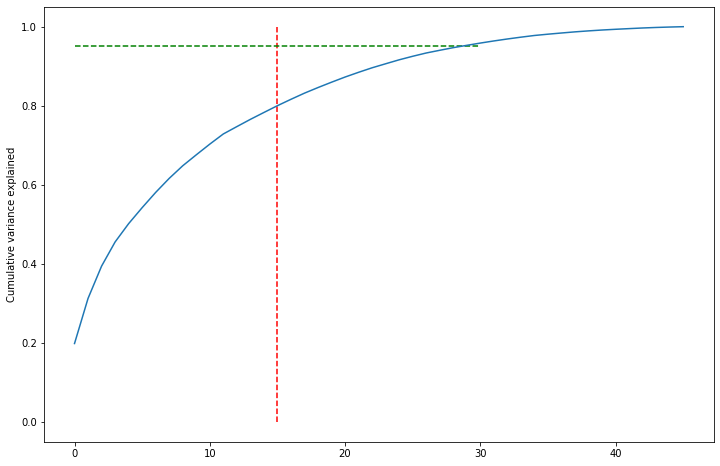

In [99]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative variance explained")
plt.show()

#### Observations:

- From the scree plot we acn see that approximately 25-30 variables can explain 95% of data variance
- With 25 variables we can explain 90% of variance.
- With 20 variables we can explain 85%
- With 15 variables we can explain 80%

#### Perform PCA with 25 components

In [100]:
pca_final = IncrementalPCA(n_components=25)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(21013, 25)

In [101]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(30000, 25)

In [102]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(25, 25)

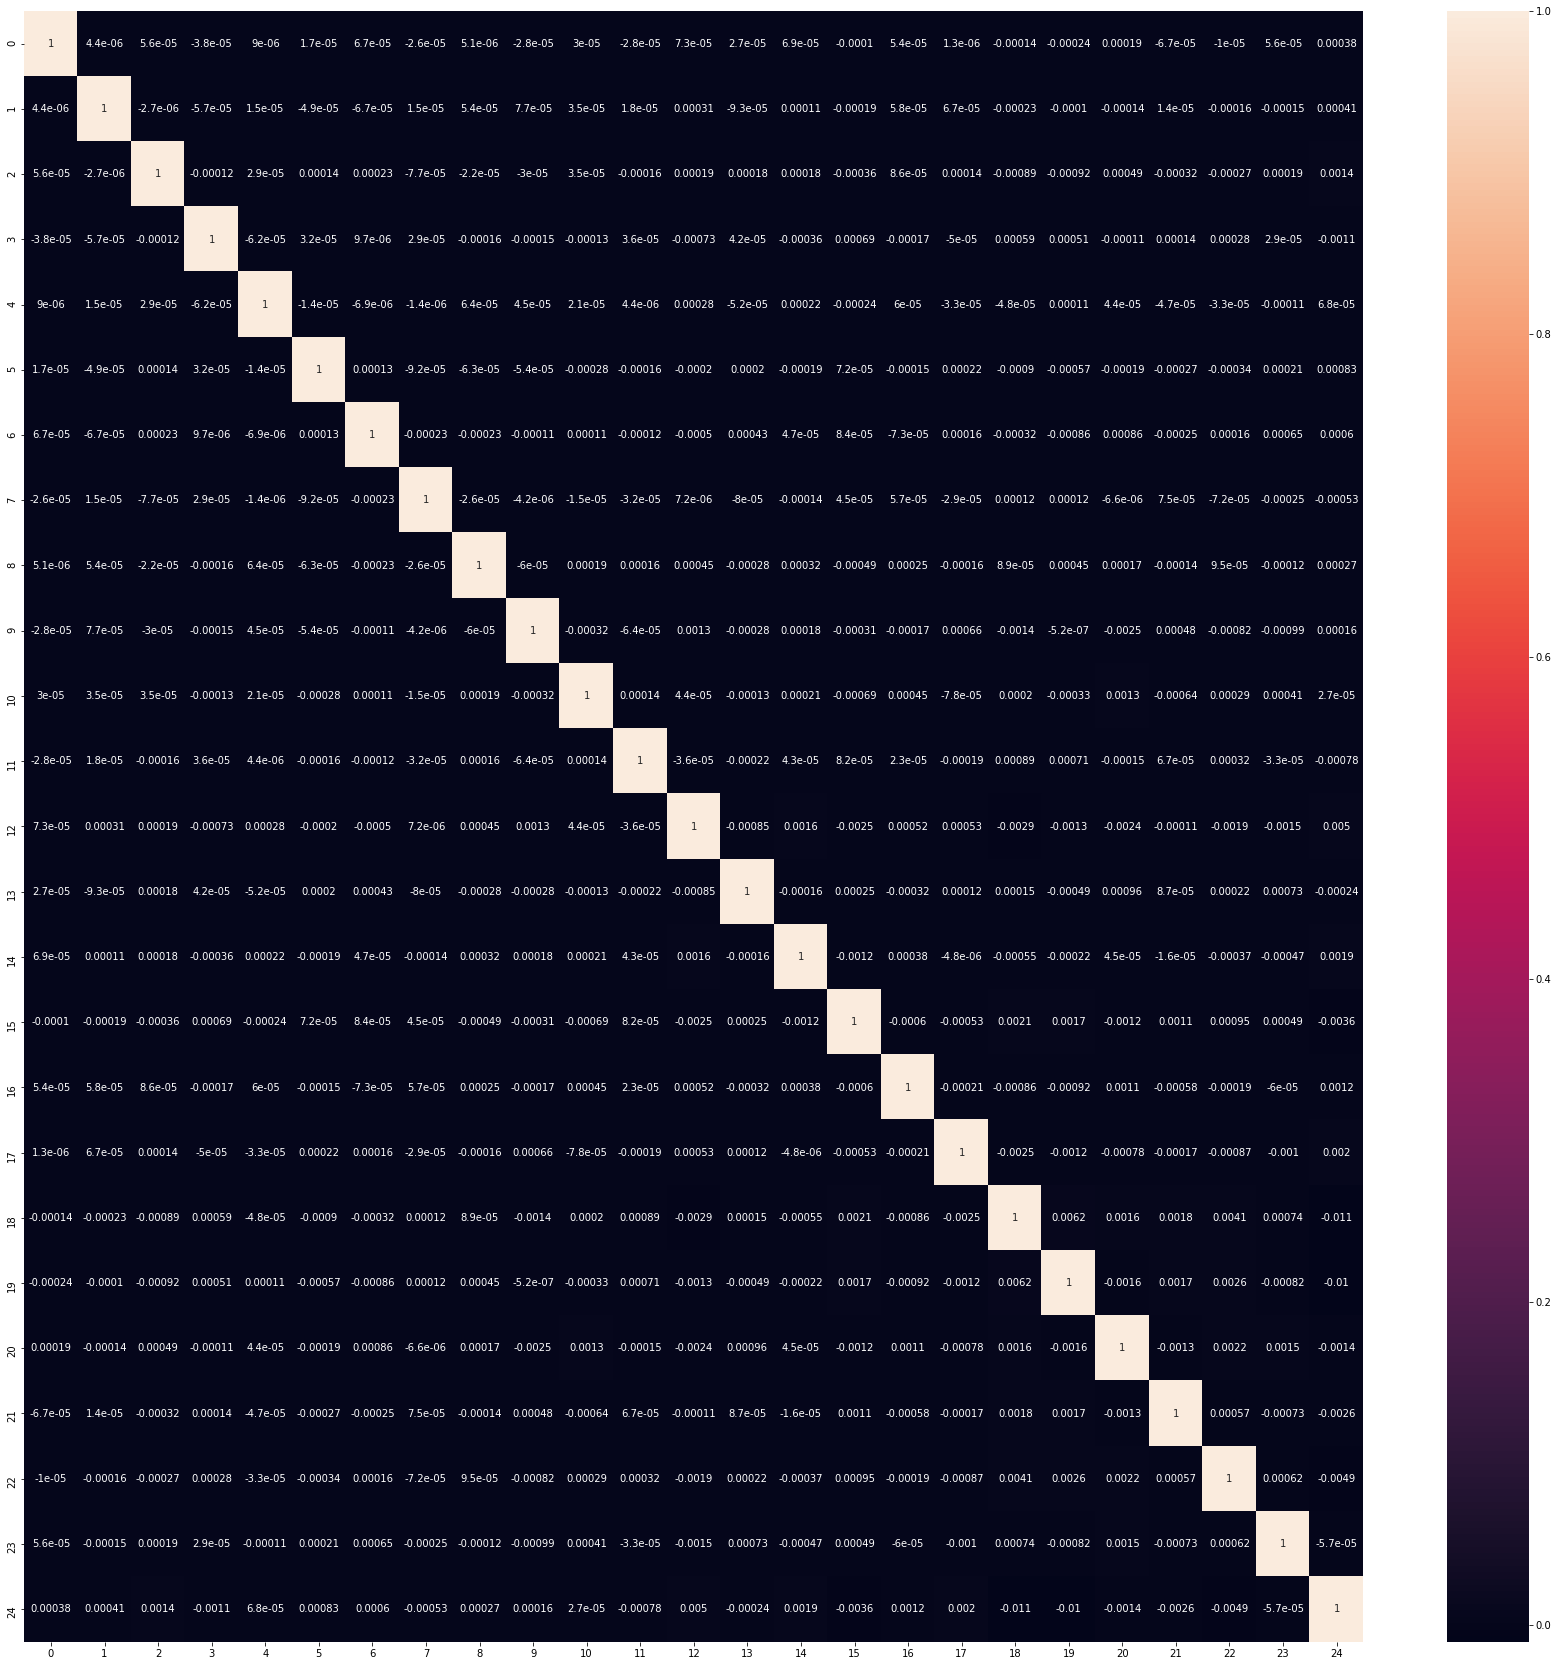

In [103]:
#plotting the correlation matrix
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)

### Handling imbalanced Dataset

- Customer chrun dataset is highly imbalanced, where more than 90% of the records are for customers not churning

- Most of the machine learning algorithm comes with class_weights that can be used to penalize the wrong prediction and for weighted imbalance class


#### How to calculate class weights.
- Dataset contains records for  0 & 1. One of the simplest techniques is to divide the number of majority records/minority records. For ex:

Weight of the minority class = Majority records/Minority records number

Weight of the class(0) = 1
Weight of the class(1) = 19274/1739 (approx = 1)

In [104]:
y_train.value_counts()

0    19274
1     1739
Name: churn_probability, dtype: int64

In [105]:
# Define the class weights 19274/1739
weights = {0:0.1, 1:1.12}

### Applying logistic regression on the data on our Principal components

In [106]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 100, class_weight=weights)

In [107]:
model_pca = logreg.fit(X_train_pca, y_train)
round(model_pca.score(X_train_pca, y_train) * 100, 2)

87.0

### Confusion matrix on training dataset

In [108]:
# Predicted probabilities
y_pred = logreg.predict_proba(X_train_pca)
y_pred_df = pd.DataFrame(y_pred) 
y_pred_1 = y_pred_df.iloc[:,[1]] 
y_pred_1.head()

,1
0,0.344385
1,0.117255
2,0.505143
3,0.197059
4,0.042449


In [109]:
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,churn_probability
4,0
15,0
23,0
24,0
27,0


#### Define a new column curn on dataset and predict the new column based on threshold 0.5

In [110]:
# Putting index
y_train_df['Id'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_train_df and y_pred_df
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Id', 'churn_probability', 'churn'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Id,churn_probability,churn
0,4,0,0.344385
1,15,0,0.117255
2,23,0,0.505143
3,24,0,0.197059
4,27,0,0.042449


In [111]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['churn_predicted'] = y_pred_final.churn.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Id,churn_probability,churn,churn_predicted
0,4,0,0.344385,0
1,15,0,0.117255,0
2,23,0,0.505143,1
3,24,0,0.197059,0
4,27,0,0.042449,0


### Confusion matrix between predicted and existing dataset

In [112]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.churn_predicted )
confusion

array([[16910,  2364],
       [  368,  1371]])

In [113]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.churn_predicted)

0.8699852472279065

### Classification report for PCA & logistic regression

In [114]:
print(classification_report(y_pred_final.churn_probability, y_pred_final.churn_predicted))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     19274
           1       0.37      0.79      0.50      1739

    accuracy                           0.87     21013
   macro avg       0.67      0.83      0.71     21013
weighted avg       0.93      0.87      0.89     21013



In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('AUC ROC curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

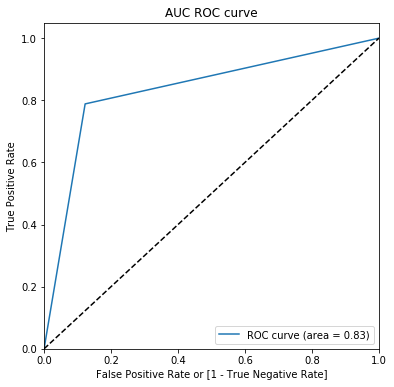

(array([0.        , 0.12265228, 1.        ]),
 array([0.        , 0.78838413, 1.        ]),
 array([2, 1, 0]))

In [116]:
draw_roc(y_pred_final.churn_probability, y_pred_final.churn_predicted)

### Calculate the cut-off matrix based on different values we have calculated

In [117]:
from sklearn.metrics import precision_score, recall_score

cutoffmatrix_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num: 
    churn_predicted = y_pred_final.churn.map( lambda x: 1 if x > i else 0)
    cm = metrics.confusion_matrix(y_pred_final.churn_probability, churn_predicted )
    
    total1 = sum(sum(cm))
    
    Accuracy    = (cm[0,0] + cm[1,1]) / total1
    Specificity =  cm[0,0] / (cm[0,0] + cm[0,1])
    Sensitivity =  cm[1,1] / (cm[1,0] + cm[1,1])
    Precision   = precision_score(y_pred_final.churn_probability, churn_predicted)
    Recall      = recall_score(y_pred_final.churn_probability, churn_predicted)
    
    cutoffmatrix_df.loc[i] = [i, Accuracy, Sensitivity, Specificity, Precision, Recall]

cutoffmatrix_df

,Probability,Accuracy,Sensitivity,Specificity,Precision,Recall
0.0,0.0,0.082758,1.000000,0.000000,0.082758,1.000000
0.1,0.1,0.311807,0.982749,0.251271,0.105886,0.982749
0.2,0.2,0.564508,0.952846,0.529470,0.154484,0.952846
0.3,0.3,0.737258,0.902818,0.722320,0.226813,0.902818
0.4,0.4,0.825061,0.845888,0.823181,0.301496,0.845888
0.5,0.5,0.869985,0.788384,0.877348,0.367068,0.788384
0.6,0.6,0.901347,0.734330,0.916416,0.442175,0.734330
0.7,0.7,0.920287,0.670500,0.942825,0.514109,0.670500
0.8,0.8,0.932661,0.601495,0.962540,0.591629,0.601495
0.9,0.9,0.935040,0.481311,0.975978,0.643846,0.481311


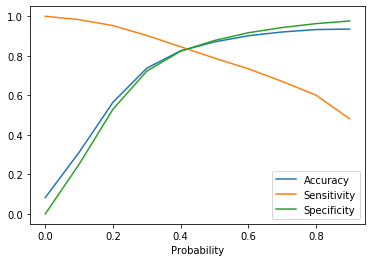

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoffmatrix_df.plot.line(x = 'Probability', y = ['Accuracy','Sensitivity','Specificity'])
plt.show()

#### From the above graph we see that 0.1 is the actual cutoff

In [119]:
## 0.10 is optimal value
y_pred_final['predicted'] = y_pred_final.churn.map( lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Id,churn_probability,churn,churn_predicted,predicted
0,4,0,0.344385,0,0
1,15,0,0.117255,0,0
2,23,0,0.505143,1,1
3,24,0,0.197059,0,0
4,27,0,0.042449,0,0


In [120]:
## calculate the overall accuracy for predicted
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.predicted)

0.8356731547137486

In [121]:
confusion = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.predicted )
confusion

array([[16112,  3162],
       [  291,  1448]])

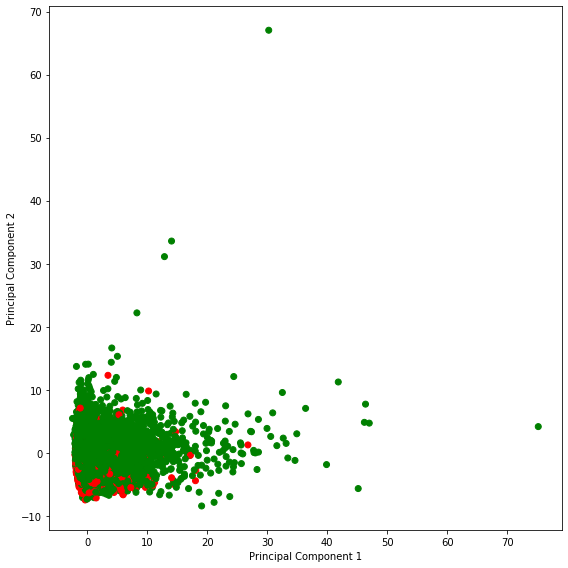

In [122]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

#### Predict the churn probability on test data set and store in a file

In [123]:
# Predicted probabilities 
y_test_pred = logreg.predict_proba(X_test_pca)
y_test_pred_df = pd.DataFrame(y_test_pred) 
y_test_pred_1 = y_pred_df.iloc[:,[1]] 
y_test_pred_1.columns = ['churn']

# join the test_data_set to predict the churn probability
y_test_pred_final = pd.concat([telecom_data_test, y_test_pred_1], axis=1)
y_test_pred_final.head() 

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8,churn
0,69999,91.882,65.330,64.445,91.94,52.39,57.94,41.73,43.56,36.26,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1692,103.0,90.0,60.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.00,0.344385
1,70000,414.168,515.568,360.868,549.86,663.06,415.59,296.33,339.64,281.66,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2533,500.0,500.0,500.0,0,0,0,1,1,1,0,1,1,1,1,1,0.00,0.00,0.00,0.117255
2,70001,329.844,434.884,746.239,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,277,500.0,1000.0,1000.0,1,1,1,0,0,0,0,0,0,0,0,0,241.84,758.41,525.61,0.505143
3,70002,43.550,171.390,24.400,45.36,207.18,24.01,555.69,522.44,549.13,110,150,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1244,110.0,260.0,0.0,0,0,0,1,1,1,1,1,1,0,1,1,0.00,0.00,0.00,0.197059
4,70003,306.854,406.289,413.329,514.79,638.28,779.78,53.73,115.93,159.26,50,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,462,356.0,490.0,546.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.00,0.042449


In [124]:
y_test_pred_final['churn_probability'] = y_test_pred_final.churn.map( lambda x: 1 if x > 0.42 else 0)
y_test_pred_final.head()

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8,churn,churn_probability
0,69999,91.882,65.330,64.445,91.94,52.39,57.94,41.73,43.56,36.26,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1692,103.0,90.0,60.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.00,0.344385,0
1,70000,414.168,515.568,360.868,549.86,663.06,415.59,296.33,339.64,281.66,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2533,500.0,500.0,500.0,0,0,0,1,1,1,0,1,1,1,1,1,0.00,0.00,0.00,0.117255,0
2,70001,329.844,434.884,746.239,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,277,500.0,1000.0,1000.0,1,1,1,0,0,0,0,0,0,0,0,0,241.84,758.41,525.61,0.505143,1
3,70002,43.550,171.390,24.400,45.36,207.18,24.01,555.69,522.44,549.13,110,150,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1244,110.0,260.0,0.0,0,0,0,1,1,1,1,1,1,0,1,1,0.00,0.00,0.00,0.197059,0
4,70003,306.854,406.289,413.329,514.79,638.28,779.78,53.73,115.93,159.26,50,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,462,356.0,490.0,546.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.00,0.042449,0


In [125]:
# Get the unique value counts
y_test_pred_final['churn_probability'].value_counts()

0    25390
1     4610
Name: churn_probability, dtype: int64

In [126]:
y_test_pred_final[['id', 'churn_probability']].to_csv('sample_pca_log.csv', index=False)

## Inference (PCA  With logistic regression)

- Accuracy on training dataset    : 86.99
- Accuracy on test dataset(kaggle): 79.87

## 2.  Model Building: Decision Tree Classifier

#### Use the weighted classifier approach to handle imbalance dataset (i.e. class_weight)

In [127]:
from sklearn.tree import DecisionTreeClassifier

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [128]:
y_train.value_counts()

0    19274
1     1739
Name: churn_probability, dtype: int64

#### Use class_weight to handle class imbalance dataset

In [129]:
dt_base = DecisionTreeClassifier(random_state = 100, max_depth = 5, class_weight=weights)
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 1.12}, max_depth=5,
                       random_state=100)

In [130]:
y_train_pred = dt_base.predict(X_train)

In [131]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     19274
           1       0.37      0.84      0.51      1739

    accuracy                           0.87     21013
   macro avg       0.68      0.86      0.72     21013
weighted avg       0.93      0.87      0.89     21013



In [132]:
#Get the accuracy score on train dataset
metrics.accuracy_score(y_train_pred, y_train)

0.8683672012563651

#### Plot the ROC curve for train data

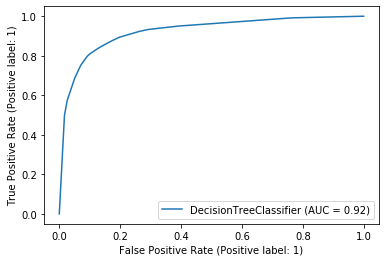

In [133]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

### Hyper-parameter tuning for the Decision Tree, Use Grid Search to get the best fit for the model

In [134]:
dt = DecisionTreeClassifier(random_state = 100, class_weight=weights)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 15, 20],
    'min_samples_leaf': [5,10,20,50,100,500],
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

grid_search = GridSearchCV(estimator = dt,param_grid = params,cv = 5, n_jobs=-1, verbose=1, scoring="accuracy")

In [135]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
CPU times: user 3.39 s, sys: 384 ms, total: 3.77 s
Wall time: 30 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.1, 1: 1.12},
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500],
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy', verbose=1)

In [136]:
# Get the results in tabular format
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.147016,0.003472,0.004338,0.000138,entropy,2,5,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.814894,0.805377,0.818463,0.825797,0.752737,0.803454,0.026197,121
1,0.145359,0.004653,0.005621,0.001618,entropy,2,5,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.814894,0.805377,0.818463,0.825797,0.752737,0.803454,0.026197,121
2,0.148683,0.006625,0.004672,0.001063,entropy,2,10,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.814894,0.805377,0.818463,0.825797,0.752737,0.803454,0.026197,121
3,0.137641,0.007530,0.004387,0.000206,entropy,2,10,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.814894,0.805377,0.818463,0.825797,0.752737,0.803454,0.026197,121
4,0.127396,0.003588,0.004435,0.000185,entropy,2,20,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.814894,0.805377,0.818463,0.825797,0.752737,0.803454,0.026197,121


In [137]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight={0: 0.1, 1: 1.12}, max_depth=10,
                       min_samples_leaf=5, min_samples_split=50,
                       random_state=100)

In [138]:
# fit the training dataset and predict y_test
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 1.12}, max_depth=10,
                       min_samples_leaf=5, min_samples_split=50,
                       random_state=100)

In [139]:
y_train_pred = dt_best.predict(X_train)

In [140]:
# Get the classification report for train data
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     19274
           1       0.43      0.94      0.59      1739

    accuracy                           0.89     21013
   macro avg       0.71      0.91      0.76     21013
weighted avg       0.95      0.89      0.91     21013



In [141]:
#Get the accuracy score on train dataset
metrics.accuracy_score(y_train_pred, y_train)

0.8911626136201399

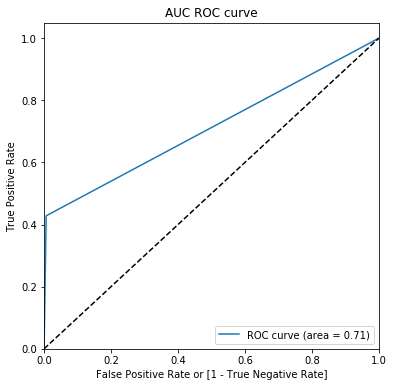

(array([0.        , 0.00622057, 1.        ]),
 array([0.        , 0.42812172, 1.        ]),
 array([2, 1, 0]))

In [142]:
# Draw the AUC ROC curve
draw_roc(y_train_pred, y_train)

### With hyper parameter tuning we can see that accuracy score increased from 86 to 89

#### Predict the probability on test dataset

In [143]:
#predict the data
y_test_pred = dt_best.predict(X_test)

In [144]:
# convert the output to dataframe and do the join with original dataset
y_test_pred_1 = pd.DataFrame(y_test_pred, columns=['churn_probability'])
y_test_pred_1['churn_probability'].value_counts()

0    27485
1     2515
Name: churn_probability, dtype: int64

In [145]:
# join the test_data_set to predict the churn probability
y_test_pred_final = pd.concat([telecom_data_test, y_test_pred_1], axis=1)
y_test_pred_final.head() 

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8,churn_probability
0,69999,91.882,65.330,64.445,91.94,52.39,57.94,41.73,43.56,36.26,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1692,103.0,90.0,60.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.00,0
1,70000,414.168,515.568,360.868,549.86,663.06,415.59,296.33,339.64,281.66,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2533,500.0,500.0,500.0,0,0,0,1,1,1,0,1,1,1,1,1,0.00,0.00,0.00,0
2,70001,329.844,434.884,746.239,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,277,500.0,1000.0,1000.0,1,1,1,0,0,0,0,0,0,0,0,0,241.84,758.41,525.61,0
3,70002,43.550,171.390,24.400,45.36,207.18,24.01,555.69,522.44,549.13,110,150,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1244,110.0,260.0,0.0,0,0,0,1,1,1,1,1,1,0,1,1,0.00,0.00,0.00,0
4,70003,306.854,406.289,413.329,514.79,638.28,779.78,53.73,115.93,159.26,50,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,462,356.0,490.0,546.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.00,0


In [146]:
y_test_pred_final['churn_probability'].value_counts()

0    27485
1     2515
Name: churn_probability, dtype: int64

In [147]:
y_test_pred_final[['id', 'churn_probability']].to_csv('sample_decision_tree.csv', index=False)

### Inference:
- Accuracy score on training data-set: 89.12
- Accuracy score on test data-set(kaggle): 87.22

## 3. Model Building: Random Forest

- Use the weighted classifier approach to handle imbalance dataset

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rf = RandomForestClassifier(n_estimators=10, 
                            max_depth=5, 
                            max_features=5, 
                            random_state=100, 
                            oob_score=True, 
                            class_weight=weights)

In [150]:
%%time
rf.fit(X_train, y_train)

CPU times: user 162 ms, sys: 3.68 ms, total: 166 ms
Wall time: 167 ms


RandomForestClassifier(class_weight={0: 0.1, 1: 1.12}, max_depth=5,
                       max_features=5, n_estimators=10, oob_score=True,
                       random_state=100)

In [151]:
rf.oob_score_

0.8748393851425308

In [152]:
# Get the classification report for random forest
predictions = rf.predict(X_train)
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     19274
           1       0.43      0.77      0.55      1739

    accuracy                           0.90     21013
   macro avg       0.70      0.84      0.74     21013
weighted avg       0.93      0.90      0.91     21013



In [153]:
#Get the accuracy score on train dataset
metrics.accuracy_score(predictions, y_train)

0.8955408556607815

### Hyper-parameter tuning for the Random forest , Use Grid Search to get the best fit for the model

Hyper parameter can be tuned further, due to os resources limitation and processing power only limited parameters have been used for demo case.

In [154]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'n_estimators': [10, 15, 20, 25, 30],
    'min_samples_split': range(10, 30, 50),
    'max_features': [5, 10, 15],
    'criterion': ["gini"]
}
# Create a based model
rf = RandomForestClassifier(class_weight=weights, random_state = 100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1,verbose = 1)

In [155]:
# Fit the grid search to the data, This step may take a lot of time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 225 candidates, totalling 900 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 1.12},
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': [10, 20, 50, 100, 200],
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [10, 15, 20, 25, 30]},
             verbose=1)

In [156]:
grid_search.best_score_

0.9306142769324774

In [157]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight={0: 0.1, 1: 1.12}, max_depth=20,
                       max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=30, random_state=100)

### Fit the best model

In [158]:
rf_best.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 1.12}, max_depth=20,
                       max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=30, random_state=100)

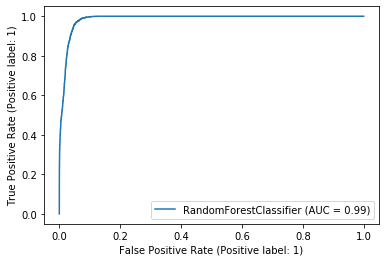

In [159]:
## Plot the ROC curve for training dataset
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [160]:
y_train_pred = rf_best.predict(X_train)

In [161]:
# Get the classification report for train data
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     19274
           1       0.67      0.92      0.78      1739

    accuracy                           0.96     21013
   macro avg       0.83      0.94      0.88     21013
weighted avg       0.97      0.96      0.96     21013



In [162]:
#Get the accuracy score on train dataset
metrics.accuracy_score(y_train_pred, y_train)

0.9560748108313901

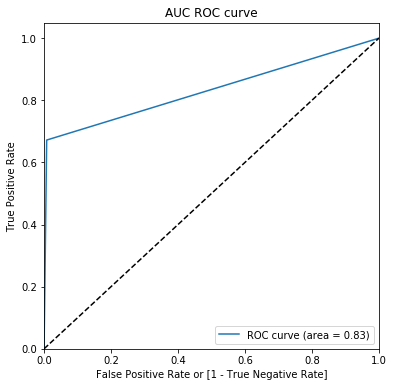

(array([0.        , 0.00777855, 1.        ]),
 array([0.        , 0.67200675, 1.        ]),
 array([2, 1, 0]))

In [163]:
# Draw the AUC ROC curve
draw_roc(y_train_pred, y_train)

### We can notice with hyper parameter tuning, acccuracy increased from 88.44 to 95.85

#### Predict the churn probability on test dataset

In [164]:
#predict the data
y_test_pred = rf_best.predict(X_test)

In [165]:
# convert the output to dataframe and do the join with original dataset
y_test_pred_1 = pd.DataFrame(y_test_pred, columns=['churn_probability'])
y_test_pred_1['churn_probability'].value_counts()

0    29705
1      295
Name: churn_probability, dtype: int64

In [166]:
# join the test_data_set to predict the churn probability
y_test_pred_final = pd.concat([telecom_data_test, y_test_pred_1], axis=1)
y_test_pred_final.head() 

,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8,churn_probability
0,69999,91.882,65.330,64.445,91.94,52.39,57.94,41.73,43.56,36.26,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1692,103.0,90.0,60.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.00,0
1,70000,414.168,515.568,360.868,549.86,663.06,415.59,296.33,339.64,281.66,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2533,500.0,500.0,500.0,0,0,0,1,1,1,0,1,1,1,1,1,0.00,0.00,0.00,0
2,70001,329.844,434.884,746.239,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,277,500.0,1000.0,1000.0,1,1,1,0,0,0,0,0,0,0,0,0,241.84,758.41,525.61,0
3,70002,43.550,171.390,24.400,45.36,207.18,24.01,555.69,522.44,549.13,110,150,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1244,110.0,260.0,0.0,0,0,0,1,1,1,1,1,1,0,1,1,0.00,0.00,0.00,0
4,70003,306.854,406.289,413.329,514.79,638.28,779.78,53.73,115.93,159.26,50,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,462,356.0,490.0,546.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.00,0


In [167]:
y_test_pred_final['churn_probability'].value_counts()

0    29705
1      295
Name: churn_probability, dtype: int64

In [168]:
y_test_pred_final[['id', 'churn_probability']].to_csv('sample_random_forest.csv', index=False)

## Inference (Model predictions on test data set)
- Accuracy score on training data-set: 95.60
- Accuracy score on test data-set(kaggle): 90.24

## 4. Model Building:  Adaboost classifier

In [169]:
from sklearn.ensemble import AdaBoostClassifier

### Use default classifier to get the accuracy score

In [170]:
# Define the decision tree classifier for AdaBoostClassifier
adaboost =  AdaBoostClassifier(n_estimators=1000, random_state = 100)

In [171]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000, random_state=100)

In [172]:
predictions = adaboost.predict(X_train)

In [173]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     19274
           1       0.72      0.54      0.62      1739

    accuracy                           0.94     21013
   macro avg       0.84      0.76      0.79     21013
weighted avg       0.94      0.94      0.94     21013



In [174]:
#Get the accuracy score on train dataset
metrics.accuracy_score(y_train_pred, y_train)

0.9560748108313901

In [175]:
confusion_matrix(y_train, y_train_pred)

array([[18496,   778],
       [  145,  1594]])

### Hyper-parameter tuning for the adaboost classifier , Use Grid Search to get the best fit for the model

In [176]:
dt = DecisionTreeClassifier(class_weight=weights, max_depth=3, max_features=5, random_state=100) 

## Choose the learning rate small to converge and get the best model
adaboost = AdaBoostClassifier(base_estimator = dt, n_estimators = 1000, learning_rate = 0.1, random_state = 100)

In [ ]:
adaboost.fit(X_train, y_train)

In [ ]:
y_train_pred = adaboost.predict(X_train)
## print the classification report
print(classification_report(y_train, y_train_pred))

In [ ]:
#Get the accuracy score on train dataset
metrics.accuracy_score(y_train_pred, y_train)

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
# Draw the AUC ROC curve
draw_roc(y_train_pred, y_train)

### Predict the churn probability on test dataset

In [ ]:
y_test_pred = adaboost.predict(X_test)

In [ ]:
# convert the output to dataframe and do the join with original dataset
y_test_pred_1 = pd.DataFrame(y_test_pred, columns=['churn_probability'])
y_test_pred_1['churn_probability'].value_counts()

In [ ]:
y_test_pred_final[['id', 'churn_probability']].to_csv('sample_adaboost.csv', index=False)

### Inference (Model predictions on test data set)
- Accuracy score on training data-set: 94.87
- Accuracy score on test data-set(kaggle): 90.24

## 5. Model Building:  XGBoot classifier

In [ ]:
import xgboost as xgb  # Load this xgboost
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import   RandomizedSearchCV, cross_val_score, learning_curve 

#### Class imbalance handling foe XG BOOST

- As per documentation scale_post_weight can be used to calculate the weight, which is defined as 
- scale_pos_weight = total_negative_examples / total_positive_examples

In [ ]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic', n_estimators = 1000)
xgb_cfl.get_params()

In [ ]:
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)

# Get our predictions
y_train_pred = xgb_cfl.predict(X_train)

In [ ]:
## print the classification report
print(classification_report(y_train, y_train_pred))

In [ ]:
#Get the accuracy score on train dataset
metrics.accuracy_score(y_train_pred, y_train)

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
# Draw the AUC ROC curve
draw_roc(y_train_pred, y_train)

### Hyper parameter tuning for XG Boost

### Due to OS resources and processing power limitation, this operation can not be performed.

### Tuning parameters for XG Boost
params = {
        'n_estimators' : [50, 100, 200], # no of trees 
        'learning_rate' : [.01, 0.1, 0.2, 0.3],  # eta
        'min_child_weight': [1, 5, 7],
        'gamma': [0.1, 0.5, 1],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.4, 0.6, 0.8],
        'max_depth': [3, 4, 5, 10]
        }

folds = 4
param_comb = 500

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=folds, verbose=3, random_state=100)

random_search.fit(X_train, y_train)

### Predict the churn probability on test dataset

In [ ]:
y_test_pred = xgb_cfl.predict(X_test)

In [ ]:
# convert the output to dataframe and do the join with original dataset
y_test_pred_1 = pd.DataFrame(y_test_pred, columns=['churn_probability'])
y_test_pred_1['churn_probability'].value_counts()

In [ ]:
y_test_pred_final[['id', 'churn_probability']].to_csv('sample_xg_boost.csv', index=False)

### Inference (Model predictions on test data set)
- Accuracy score on training data-set: 98.42
- Accuracy score on test data-set(kaggle): 

### Feature Importance Xgboost Model

In [ ]:
xgb_cfl.feature_importances_

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [ ]:
# Scatter plot 
trace = go.Scatter(
    y = xgb_cfl.feature_importances_,
    x = X_train.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1.3,
        size = 12,
        color = xgb_cfl.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X_train.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'XGBOOST Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

### Select top 20 features that impact the most 

In [ ]:
results = pd.DataFrame()
results['columns'] = X_train.columns
results['importances'] = xgb_cfl.feature_importances_
results.sort_values(by = 'importances', ascending = False, inplace=True)

results[:20]

## 6. Final inference

### 6.1 Approach
- Telecom industry pofit mainly comes from high value customers. Postpaid customer will inform telecom providers and company will know in advance that they are leaving out. However, for prepaid customers they would like to predict based on past month data for ex: usage of services, incoming, out going and other facilities.

- Some of the customers may only use the services like facebook, special and others may not use for inconing, outgoing and others. These customers are low value customers.

### High Value Customers:
- High value customers will have have amount of data for incoming, outgoing data usages (partially). From the data set we can the total variable which represents quite significant amount of data. So, company may focus on these high value customers and try to retain them.

### Model Analysis:
- A number of models were used to analyze the pattern and predict the output on test data set. All the models are listed below:

   1. PCA with Logistic regression
   2. Decision Tree Classifier
   3. Random Forest Classifier
   4. Adaboost Classifier
   5. XG Boost Classifier:

| Models                    | Training Data (accuracy) | Testing Data (accuracy) |
| ---                       | ---                      | ---                     |
| PCA & Logistic regression | Gaussian                 | .843                    |
| Decision Tree Classifer   | Gaussian                 | .843                    |
| Random Forest Classifier  | Gaussian                 | .843                    |
| XG Boost Classifier.      | Gaussian                 | .843                    |


### 6.2 Winner Model


### 6.3 Top 20 features